<a href="https://colab.research.google.com/github/AimanFariz/Soccer-Analytics/blob/main/NCAA_D1_F23_Big_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To everyone who's going to see and use this code or play around with this Colab file, here are some contexts:

- This file is started by me, the most handsome Aiman Fariz Zaqwan Bin Akmal Hizam, as part of my involvement in the Pathway to Sports Academy at The University of Tulsa.
- The database used for this file is created by me and my brother. We only collected overall season stats and not complete game stats since that would be too much work (lol). The results are collected from official NCAA, ESPN, and Wikipedia webpage.
- If you find any mistakes in the names or scorelines, please email me at aba9132@utulsa.edu and kindly let me know, or you can also choose to fix it yourself, whichever works for you.
- Some terminology here: 'wpc' is Win Percentage, 'pyth' is Pythagorean Expectation.

Enjoy!

In [2]:
# Load the packages

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Pathway to Sports - MSOC Data Analytics/F23/Big 10")

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
# Import the display module from IPython
from IPython.display import display

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)

Big_10_F23 = pd.read_csv("NCAA D1 Soccer Fall 23 - Big 10.csv")

# data.head() # run this to see first 5 columns

print(Big_10_F23.columns.tolist()) # run this line to only see column titles

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Date', 'Home Team', 'Away Team', 'HTHG', 'HTAG', 'FTHG', 'FTAG', 'Result', 'Match Type', 'Home Full Name', 'Away Full Name']


In [ ]:
# making sure i'm in the correct folder
!ls /content/drive/My\ Drive/Pathway\ to\ Sports\ -\ MSOC\ Data\ Analytics/

'coursera '   F23  'Master Resources and Links.gdoc'  'NCAA D1 Soccer Fall 23.gsheet'   Tulsa


In [3]:
Big_10_F23['hwinvalue'] = np.where(Big_10_F23['Result']=='H',1,np.where(Big_10_F23['Result']=='D',0.5,0))
Big_10_F23['awinvalue'] = np.where(Big_10_F23['Result']=='A',1,np.where(Big_10_F23['Result']=='D',0.5,0))
# Big_10_F23['hleadvalue'] = np.where(Big_10_F23['HTHG']>Big_10_F23['HTAG'],1,0)
# Big_10_F23['aleadvalue'] = np.where(Big_10_F23['HTAG']>Big_10_F23['HTHG'],1,0)
# Big_10_F23['htleader'] = Big_10_F23['HTHG'] > Big_10_F23['HTAG']
# Big_10_F23['comeback'] = (Big_10_F23['htleader'] & (Big_10_F23['FTHG'] < Big_10_F23['FTAG'])) | (~Big_10_F23['htleader'] & (Big_10_F23['FTHG'] > Big_10_F23['FTAG']))

# Big_10_F23['losing_at_half'] = Big_10_F23['HTHG'] < Big_10_F23['HTAG']
# Big_10_F23['comeback'] = Big_10_F23['losing_at_half'] & ((Big_10_F23['FTHG'] > Big_10_F23['FTAG']) | (Big_10_F23['FTHG'] == Big_10_F23['FTAG']))


Big_10_F23['count'] = 1
Big_10_F23

,Date,Home Team,Away Team,HTHG,HTAG,FTHG,FTAG,Result,Match Type,Home Full Name,Away Full Name,hwinvalue,awinvalue,count
0,8/24/2023,NW,STTHOM,0,0.0,2,1,H,Non-Conference,Northwestern University,University of St. Thomas (Minnesota),1.0,0.0,1
1,8/24/2023,MICH,LMU,0,0.0,1,1,D,Non-Conference,University of Michigan,Loyola Marymount University,0.5,0.5,1
2,8/24/2023,DEL,RUTGER,1,1.0,3,2,H,Non-Conference,University of Delaware,Rutgers University,1.0,0.0,1
3,8/24/2023,OHIOST,CSUN,0,0.0,1,1,D,Non-Conference,Ohio State University,"California State University, Northridge",0.5,0.5,1
4,8/24/2023,PITT,PENNST,0,1.0,1,1,D,Non-Conference,University of Pittsburgh,Pennsylvania State University,0.5,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,11/3/2023,IND,WISC,1,0.0,2,1,H,Conference,Indiana University,University of Wisconsin,1.0,0.0,1
109,11/3/2023,NW,MICH,0,0.0,0,1,A,Conference,Northwestern University,University of Michigan,0.0,1.0,1
110,11/8/2023,PENNST,OHIOST,1,1.0,1,1,D,Conference,Pennsylvania State University,Ohio State University,0.5,0.5,1
111,11/8/2023,IND,MICH,3,1.0,4,3,H,Conference,Indiana University,University of Michigan,1.0,0.0,1


In [4]:
# this code snippet groups strictly Big_10 teams
# assuming your DataFrame is called Big_10_F23
Big_10_F23_conference_matches = Big_10_F23[Big_10_F23['Match Type'] == 'Conference']
# print(Big_10_F23_conference_matches.columns.tolist())
Big_10_F23_conference_matches

,Date,Home Team,Away Team,HTHG,HTAG,FTHG,FTAG,Result,Match Type,Home Full Name,Away Full Name,hwinvalue,awinvalue,count
47,9/14/2023,MD,MICH,2,1.0,2,2,D,Conference,University of Maryland,University of Michigan,0.5,0.5,1
48,9/15/2023,OHIOST,PENNST,0,1.0,0,3,A,Conference,Ohio State University,Pennsylvania State University,0.0,1.0,1
49,9/15/2023,IND,WISC,0,0.0,0,0,D,Conference,Indiana University,University of Wisconsin,0.5,0.5,1
51,9/17/2023,RUTGER,MICHST,0,0.0,1,1,D,Conference,Rutgers University,Michigan State University,0.5,0.5,1
52,9/19/2023,PENNST,MD,1,0.0,1,0,H,Conference,Pennsylvania State University,University of Maryland,1.0,0.0,1
56,9/19/2023,WISC,NW,0,0.0,2,2,D,Conference,University of Wisconsin,Northwestern University,0.5,0.5,1
57,9/22/2023,MICH,RUTGER,0,2.0,3,2,H,Conference,University of Michigan,Rutgers University,1.0,0.0,1
58,9/22/2023,MICHST,IND,1,1.0,2,1,H,Conference,Michigan State University,Indiana University,1.0,0.0,1
60,9/24/2023,WISC,MD,0,0.0,1,0,H,Conference,University of Wisconsin,University of Maryland,1.0,0.0,1
61,9/24/2023,NW,OHIOST,2,1.0,4,2,H,Conference,Northwestern University,Ohio State University,1.0,0.0,1


In [5]:
# This code snippet is Home, for all Big_10 matches including non-conference and conference
Big_10_F23_Home = Big_10_F23.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
Big_10_F23_Home = Big_10_F23_Home.rename(columns={"Home Team":"Teams", "count":"Played Home","FTHG":"Scored","FTAG":"Conceded"})
Big_10_F23_Home

# This code snippet is Away, for all Big_10 matches including non-conference and conference
Big_10_F23_Away = Big_10_F23.groupby(['Away Team'])[['count','awinvalue','HTAG','HTHG','FTAG','FTHG']].sum().reset_index()
Big_10_F23_Away = Big_10_F23_Away.rename(columns={"Away Team":"Teams", "count":"Played Home", "FTAG":"Scored","FTHG":"Conceded"})
Big_10_F23_Away

# # This code snippet is Home, for all Big_10 conference matches
Big_10_F23_Conference_Home = Big_10_F23_conference_matches.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
Big_10_F23_Conference_Home = Big_10_F23_Conference_Home.rename(columns={"Home Team":"Teams", "count":"Played","FTHG":"Scored","FTAG":"Conceded"})
# print(Big_10_F23_Conference_Home)

Big_10_F23_Conference_Home = Big_10_F23_conference_matches.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
Big_10_F23_Conference_Home = Big_10_F23_Conference_Home.rename(columns={"Home Team":"Teams", "count":"Ph", "FTHG":"Scored","FTAG":"Conceded"})
Big_10_F23_Conference_Home

# This code snippet is Away, for all Big_10 conference matches
Big_10_F23_Conference_Away = Big_10_F23_conference_matches.groupby(['Away Team'])[['count','awinvalue','HTAG','HTHG','FTAG','FTHG']].sum().reset_index()
Big_10_F23_Conference_Away = Big_10_F23_Conference_Away.rename(columns={"Away Team":"Teams", "count":"Pa", "FTAG":"Scored","FTHG":"Conceded"})
# print(Big_10_F23_Conference_Away)

In [6]:
# For conference matches only

Big_10_F23_conference_Merged = pd.merge(Big_10_F23_Conference_Away,Big_10_F23_Conference_Home, on = ['Teams'])
Big_10_F23_conference_Merged['W'] = Big_10_F23_conference_Merged['awinvalue'] + Big_10_F23_conference_Merged['hwinvalue']
Big_10_F23_conference_Merged['G'] = Big_10_F23_conference_Merged['Ph'] + Big_10_F23_conference_Merged['Pa']
Big_10_F23_conference_Merged['GF'] = Big_10_F23_conference_Merged['Scored_x'] + Big_10_F23_conference_Merged['Scored_y']
Big_10_F23_conference_Merged['GA'] = Big_10_F23_conference_Merged['Conceded_x'] + Big_10_F23_conference_Merged['Conceded_y']
Big_10_F23_conference_Merged['HTGA'] = Big_10_F23_conference_Merged['HTAG_x'] + Big_10_F23_conference_Merged['HTAG_y']
Big_10_F23_conference_Merged['HTGF'] = Big_10_F23_conference_Merged['HTHG_x'] + Big_10_F23_conference_Merged['HTHG_y']
Big_10_F23_conference_Merged['HTGD'] = Big_10_F23_conference_Merged['HTGF'] - Big_10_F23_conference_Merged['HTGA']
Big_10_F23_conference_Merged['GD'] = Big_10_F23_conference_Merged['GF'] - Big_10_F23_conference_Merged['GA']
Big_10_F23_conference_Merged['2GF'] = Big_10_F23_conference_Merged['GF'] - Big_10_F23_conference_Merged['HTGF']
Big_10_F23_conference_Merged['2GA'] = Big_10_F23_conference_Merged['GA'] - Big_10_F23_conference_Merged['HTGA']
Big_10_F23_conference_Merged['2GD'] = Big_10_F23_conference_Merged['2GF'] - Big_10_F23_conference_Merged['2GA']
Big_10_F23_conference_Merged['Change_GD'] = Big_10_F23_conference_Merged['2GD'] - Big_10_F23_conference_Merged['HTGD']
Big_10_F23_conference_Merged['awpc'] = Big_10_F23_conference_Merged['awinvalue'] / Big_10_F23_conference_Merged['Pa'] *100
Big_10_F23_conference_Merged['hwpc'] = Big_10_F23_conference_Merged['hwinvalue'] / Big_10_F23_conference_Merged['Ph'] *100
Big_10_F23_conference_Merged['wpc'] = Big_10_F23_conference_Merged['W']/Big_10_F23_conference_Merged['G']
Big_10_F23_conference_Merged['pyth'] = Big_10_F23_conference_Merged['GF']**2/(Big_10_F23_conference_Merged['GF']**2 + Big_10_F23_conference_Merged['GA']**2)
Big_10_F23_conference_Merged['pyth_ht'] = Big_10_F23_conference_Merged['HTGF']**2/(Big_10_F23_conference_Merged['HTGF']**2 + Big_10_F23_conference_Merged['HTGA']**2)
Big_10_F23_conference_Merged['pyth_ht'] = Big_10_F23_conference_Merged['HTGF']**2/(Big_10_F23_conference_Merged['HTGF']**2 + Big_10_F23_conference_Merged['HTGA']**2)
Big_10_F23_conference_Merged['pyth_h2'] = Big_10_F23_conference_Merged['2GF']**2/(Big_10_F23_conference_Merged['2GF']**2 + Big_10_F23_conference_Merged['2GA']**2)
Big_10_F23_conference_Merged['pyth_diff'] = Big_10_F23_conference_Merged['pyth_h2'] - Big_10_F23_conference_Merged['pyth_ht']
Big_10_F23_conference_Merged

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,IND,4,2.0,2.0,3,5,5,7,6.0,8,2.0,13,6,8.0,11,18,11,4.0,11,7.0,7,7,7.0,0.0,-7.0,50.000000,85.714286,0.727273,0.728090,0.883212,0.500000,-0.383212
1,MD,4,0.5,3.0,2,3,8,4,0.5,3,4.0,4,8,1.0,8,7,16,7.0,5,-2.0,-9,2,9.0,-7.0,-5.0,12.500000,12.500000,0.125000,0.160656,0.337838,0.047059,-0.290779
2,MICH,6,2.5,2.0,7,6,10,4,3.0,3,2.0,7,3,5.5,10,13,13,4.0,10,6.0,0,3,9.0,-6.0,-12.0,41.666667,75.000000,0.550000,0.500000,0.862069,0.100000,-0.762069
3,MICHST,4,3.0,5.0,0,6,3,5,2.0,1,5.0,6,7,5.0,9,12,10,10.0,1,-9.0,2,11,0.0,11.0,20.0,75.000000,40.000000,0.555556,0.590164,0.009901,1.000000,0.990099
4,NW,4,1.5,2.0,2,5,7,5,3.0,3,3.0,8,5,4.5,9,13,12,5.0,5,0.0,1,8,7.0,1.0,1.0,37.500000,60.000000,0.500000,0.539936,0.500000,0.566372,0.066372
5,OHIOST,7,4.5,6.0,4,11,9,3,1.5,1,2.0,4,4,6.0,10,15,13,8.0,5,-3.0,2,10,5.0,5.0,8.0,64.285714,50.000000,0.600000,0.571066,0.280899,0.800000,0.519101
6,PENNST,5,2.0,1.0,4,5,4,6,4.5,6,3.0,12,5,6.5,11,17,9,4.0,10,6.0,8,7,5.0,2.0,-4.0,40.000000,75.000000,0.590909,0.781081,0.862069,0.662162,-0.199907
7,RUTGER,5,1.0,5.0,4,6,13,4,2.5,3,1.0,5,5,3.5,9,11,18,6.0,7,1.0,-7,4,12.0,-8.0,-9.0,20.000000,62.500000,0.388889,0.271910,0.576471,0.100000,-0.476471
8,WISC,4,1.0,0.0,3,3,5,5,2.0,1,4.0,5,7,3.0,9,8,12,4.0,4,0.0,-4,4,8.0,-4.0,-4.0,25.000000,40.000000,0.333333,0.307692,0.500000,0.200000,-0.300000


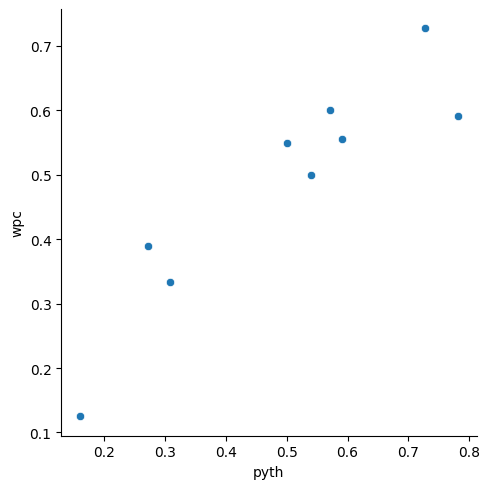

In [7]:
sns.relplot(x="pyth", y="wpc", data = Big_10_F23_conference_Merged)

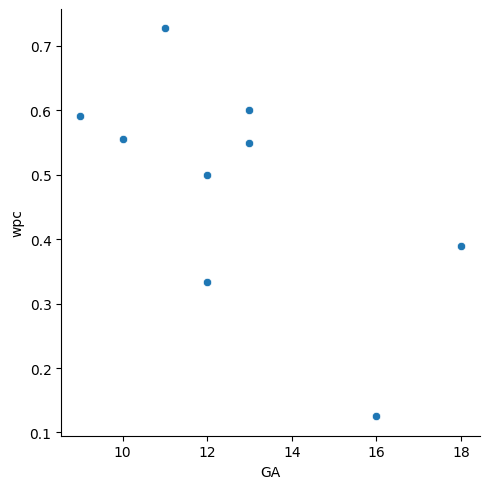

In [8]:
sns.relplot(x="GA", y="wpc", data = Big_10_F23_conference_Merged)

In [ ]:
pyth_lm = smf.ols(formula = 'GA ~ wpc', data=Big_10_F23_conference_Merged).fit()
print(pyth_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     GA   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     15.65
Date:                Fri, 09 Aug 2024   Prob (F-statistic):            0.00549
Time:                        05:25:51   Log-Likelihood:                -20.657
No. Observations:                   9   AIC:                             45.31
Df Residuals:                       7   BIC:                             45.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0426      1.999     10.028      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


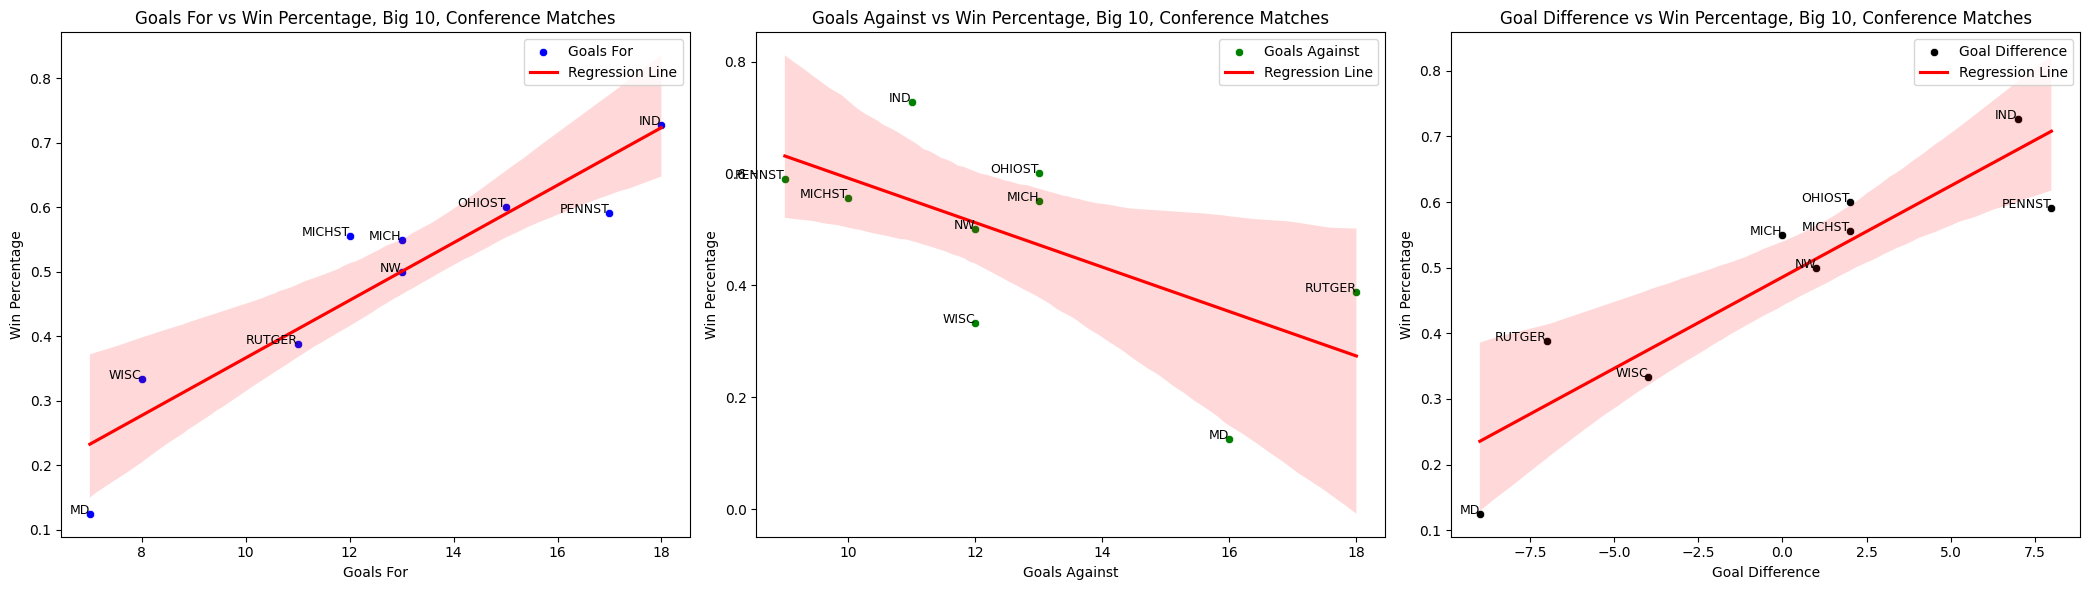

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='GF ~ wpc', data=Big_10_F23_conference_Merged).fit()
ga_lm = smf.ols(formula='GA ~ wpc', data=Big_10_F23_conference_Merged).fit()
gdf_lm = smf.ols(formula='GD ~ wpc', data=Big_10_F23_conference_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='GF', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='GF', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Goals For vs Win Percentage, Big 10, Conference Matches')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    axes[0].text(Big_10_F23_conference_Merged['GF'][i],
                 Big_10_F23_conference_Merged['wpc'][i],
                 Big_10_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='GA', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='GA', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Goals Against vs Win Percentage, Big 10, Conference Matches')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    axes[1].text(Big_10_F23_conference_Merged['GA'][i],
                 Big_10_F23_conference_Merged['wpc'][i],
                 Big_10_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='GD', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='GD', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Goal Difference vs Win Percentage, Big 10, Conference Matches')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    axes[2].text(Big_10_F23_conference_Merged['GD'][i],
                 Big_10_F23_conference_Merged['wpc'][i],
                 Big_10_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()


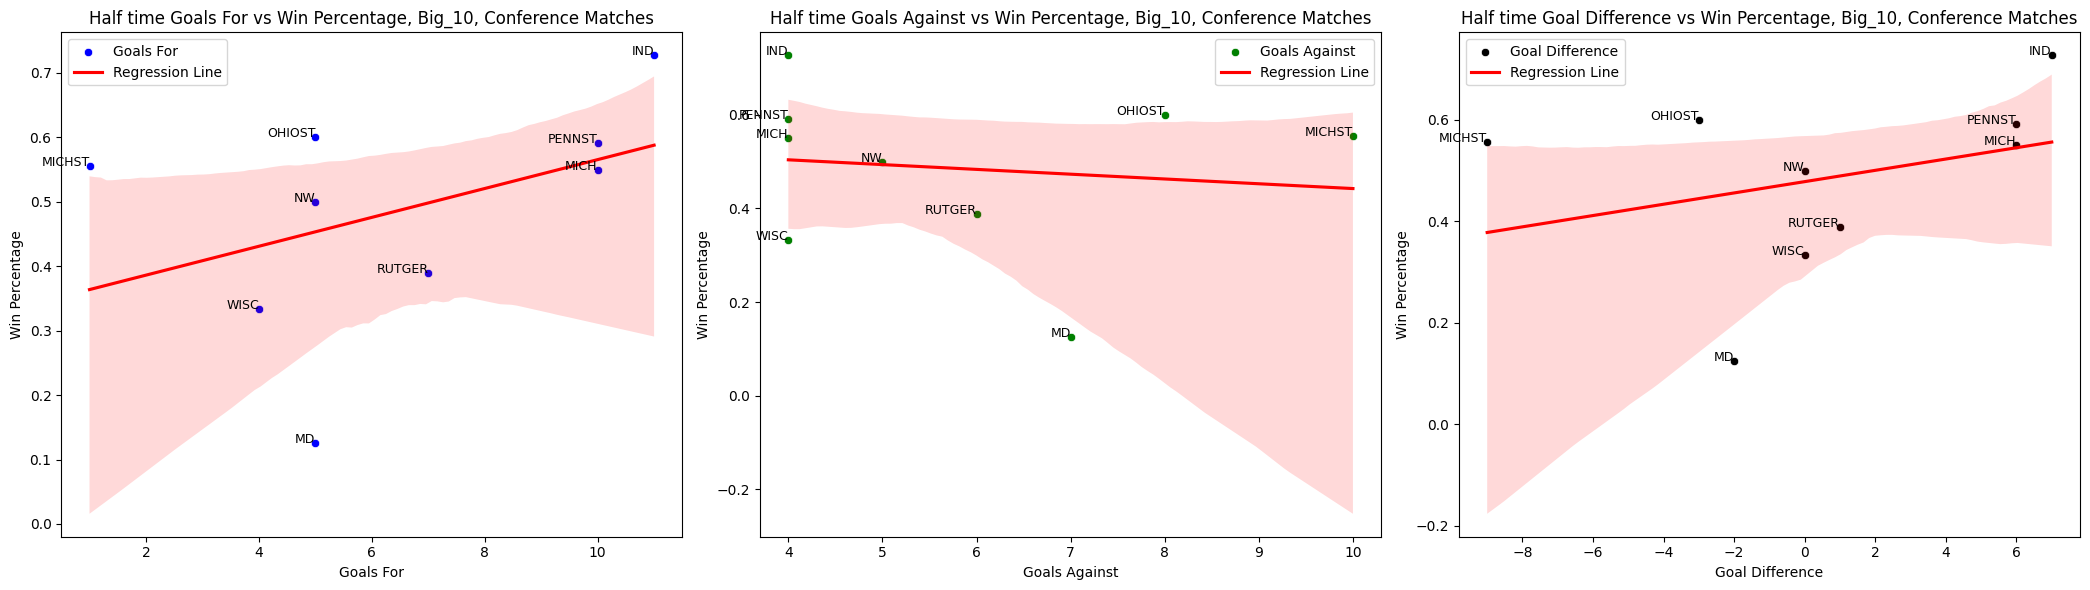

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='HTGF ~ wpc', data=Big_10_F23_conference_Merged).fit()
ga_lm = smf.ols(formula='HTGA ~ wpc', data=Big_10_F23_conference_Merged).fit()
gdf_lm = smf.ols(formula='HTGD ~ wpc', data=Big_10_F23_conference_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='HTGF', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='HTGF', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Half time Goals For vs Win Percentage, Big_10, Conference Matches')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    axes[0].text(Big_10_F23_conference_Merged['HTGF'][i],
                 Big_10_F23_conference_Merged['wpc'][i],
                 Big_10_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='HTGA', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='HTGA', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Half time Goals Against vs Win Percentage, Big_10, Conference Matches')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    axes[1].text(Big_10_F23_conference_Merged['HTGA'][i],
                 Big_10_F23_conference_Merged['wpc'][i],
                 Big_10_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='HTGD', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='HTGD', y='wpc', data=Big_10_F23_conference_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Half time Goal Difference vs Win Percentage, Big_10, Conference Matches')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    axes[2].text(Big_10_F23_conference_Merged['HTGD'][i],
                 Big_10_F23_conference_Merged['wpc'][i],
                 Big_10_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()


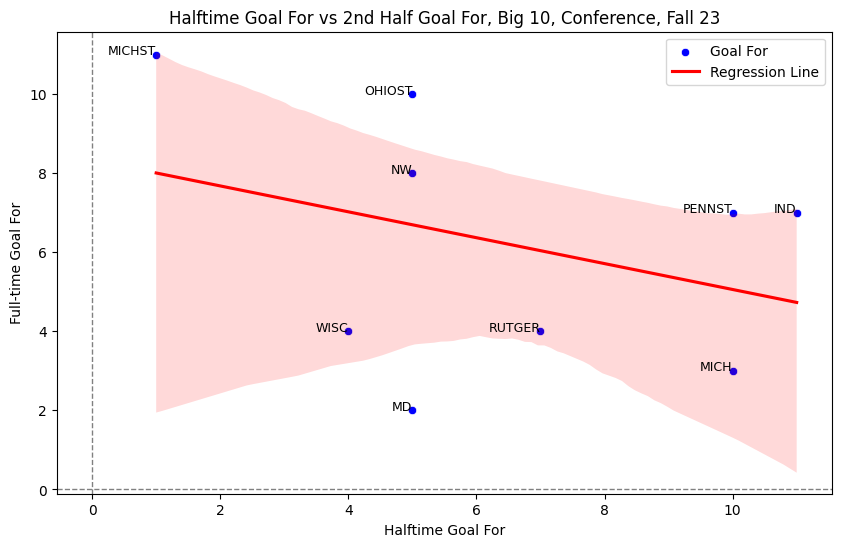

In [13]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGF', y='2GF', data=Big_10_F23_conference_Merged, color='blue', label='Goal For')
sns.regplot(x='HTGF', y='2GF', data=Big_10_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    plt.text(Big_10_F23_conference_Merged['HTGF'][i],
             Big_10_F23_conference_Merged['2GF'][i],
             Big_10_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goal For vs 2nd Half Goal For, Big 10, Conference, Fall 23')
plt.xlabel('Halftime Goal For')
plt.ylabel('Full-time Goal For')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

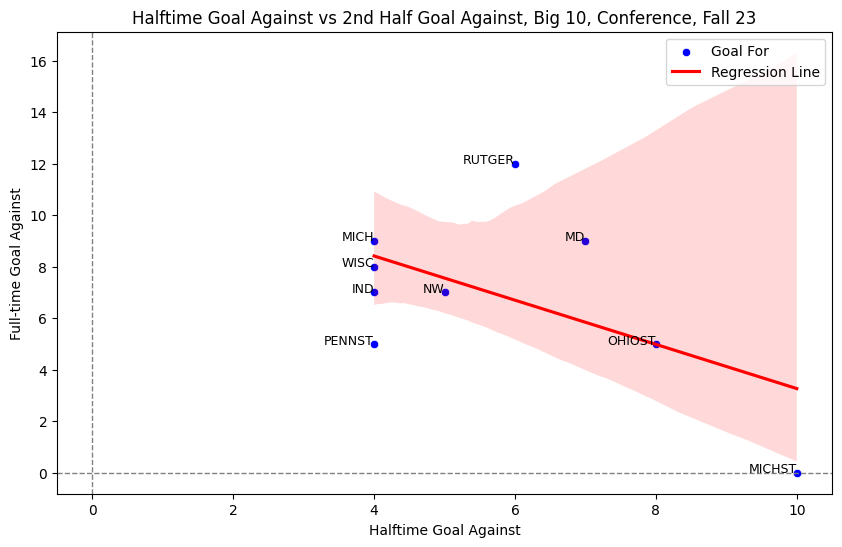

In [14]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGA', y='2GA', data=Big_10_F23_conference_Merged, color='blue', label='Goal For')
sns.regplot(x='HTGA', y='2GA', data=Big_10_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    plt.text(Big_10_F23_conference_Merged['HTGA'][i],
             Big_10_F23_conference_Merged['2GA'][i],
             Big_10_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goal Against vs 2nd Half Goal Against, Big 10, Conference, Fall 23')
plt.xlabel('Halftime Goal Against')
plt.ylabel('Full-time Goal Against')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

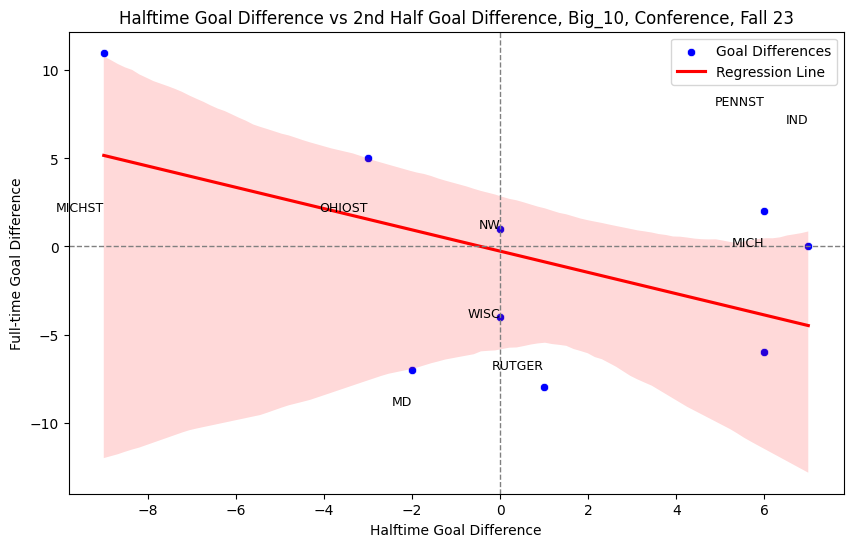

In [15]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='2GD', data=Big_10_F23_conference_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGD', y='2GD', data=Big_10_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(Big_10_F23_conference_Merged.shape[0]):
    plt.text(Big_10_F23_conference_Merged['HTGD'][i],
             Big_10_F23_conference_Merged['GD'][i],
             Big_10_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goal Difference vs 2nd Half Goal Difference, Big_10, Conference, Fall 23')
plt.xlabel('Halftime Goal Difference')
plt.ylabel('Full-time Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [16]:
Big_10_F23_conference_Merged['2GFRatio'] = Big_10_F23_conference_Merged['2GF'] / Big_10_F23_conference_Merged['HTGF']
Big_10_F23_conference_Merged['2GARatio'] = Big_10_F23_conference_Merged['2GA'] / Big_10_F23_conference_Merged['HTGA']
Big_10_F23_conference_Merged['1GFRatio'] = Big_10_F23_conference_Merged['HTGF'] / Big_10_F23_conference_Merged['2GF']
Big_10_F23_conference_Merged['1GARatio'] = Big_10_F23_conference_Merged['HTGA'] / Big_10_F23_conference_Merged['2GA']
Big_10_F23_conference_Merged['GF/GARatio'] = Big_10_F23_conference_Merged['GF'] / Big_10_F23_conference_Merged['GA']
Big_10_F23_conference_Merged

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,IND,4,2.0,2.0,3,5,5,7,6.0,8,2.0,13,6,8.0,11,18,11,4.0,11,7.0,7,7,7.0,0.0,-7.0,50.000000,85.714286,0.727273,0.728090,0.883212,0.500000,-0.383212,0.636364,1.750000,1.571429,0.571429,1.636364
1,MD,4,0.5,3.0,2,3,8,4,0.5,3,4.0,4,8,1.0,8,7,16,7.0,5,-2.0,-9,2,9.0,-7.0,-5.0,12.500000,12.500000,0.125000,0.160656,0.337838,0.047059,-0.290779,0.400000,1.285714,2.500000,0.777778,0.437500
2,MICH,6,2.5,2.0,7,6,10,4,3.0,3,2.0,7,3,5.5,10,13,13,4.0,10,6.0,0,3,9.0,-6.0,-12.0,41.666667,75.000000,0.550000,0.500000,0.862069,0.100000,-0.762069,0.300000,2.250000,3.333333,0.444444,1.000000
3,MICHST,4,3.0,5.0,0,6,3,5,2.0,1,5.0,6,7,5.0,9,12,10,10.0,1,-9.0,2,11,0.0,11.0,20.0,75.000000,40.000000,0.555556,0.590164,0.009901,1.000000,0.990099,11.000000,0.000000,0.090909,inf,1.200000
4,NW,4,1.5,2.0,2,5,7,5,3.0,3,3.0,8,5,4.5,9,13,12,5.0,5,0.0,1,8,7.0,1.0,1.0,37.500000,60.000000,0.500000,0.539936,0.500000,0.566372,0.066372,1.600000,1.400000,0.625000,0.714286,1.083333
5,OHIOST,7,4.5,6.0,4,11,9,3,1.5,1,2.0,4,4,6.0,10,15,13,8.0,5,-3.0,2,10,5.0,5.0,8.0,64.285714,50.000000,0.600000,0.571066,0.280899,0.800000,0.519101,2.000000,0.625000,0.500000,1.600000,1.153846
6,PENNST,5,2.0,1.0,4,5,4,6,4.5,6,3.0,12,5,6.5,11,17,9,4.0,10,6.0,8,7,5.0,2.0,-4.0,40.000000,75.000000,0.590909,0.781081,0.862069,0.662162,-0.199907,0.700000,1.250000,1.428571,0.800000,1.888889
7,RUTGER,5,1.0,5.0,4,6,13,4,2.5,3,1.0,5,5,3.5,9,11,18,6.0,7,1.0,-7,4,12.0,-8.0,-9.0,20.000000,62.500000,0.388889,0.271910,0.576471,0.100000,-0.476471,0.571429,2.000000,1.750000,0.500000,0.611111
8,WISC,4,1.0,0.0,3,3,5,5,2.0,1,4.0,5,7,3.0,9,8,12,4.0,4,0.0,-4,4,8.0,-4.0,-4.0,25.000000,40.000000,0.333333,0.307692,0.500000,0.200000,-0.300000,1.000000,2.000000,1.000000,0.500000,0.666667


<ipython-input-19-0ab4f266c5a7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GFRatio', y='Teams', data=Big_10_F23_conference_Merged_sorted, palette='Blues_d')


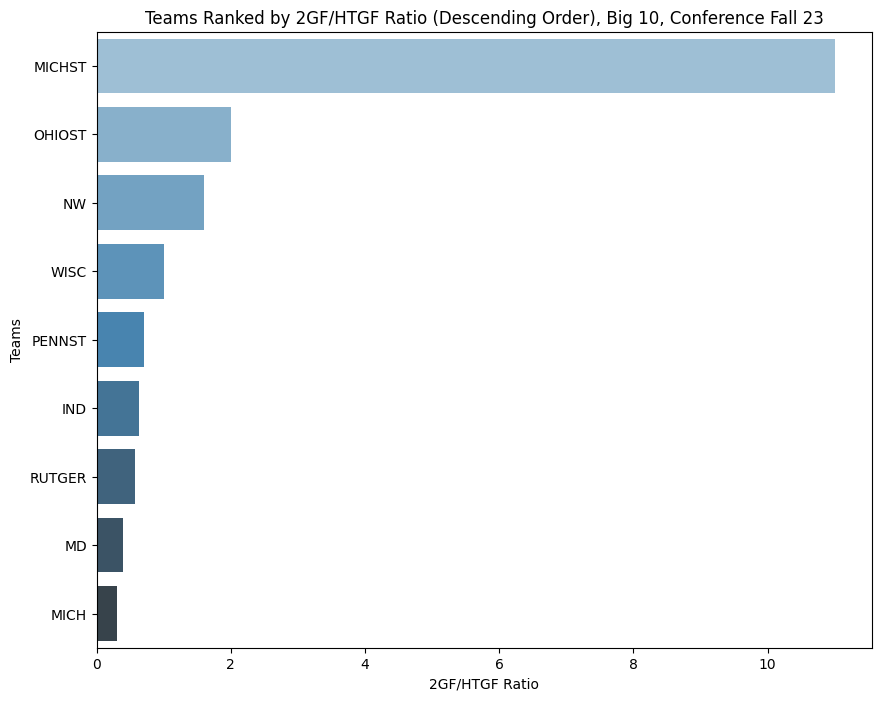

In [19]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Big_10_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Big_10_F23_conference_Merged.dropna(subset=['2GFRatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Big_10_F23_conference_Merged_sorted = Big_10_F23_conference_Merged.sort_values('2GFRatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GFRatio', y='Teams', data=Big_10_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by 2GF/HTGF Ratio (Descending Order), Big 10, Conference Fall 23')
plt.xlabel('2GF/HTGF Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-21-fc111334833d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GARatio', y='Teams', data=Big_10_F23_conference_Merged_sorted, palette='Reds_d')


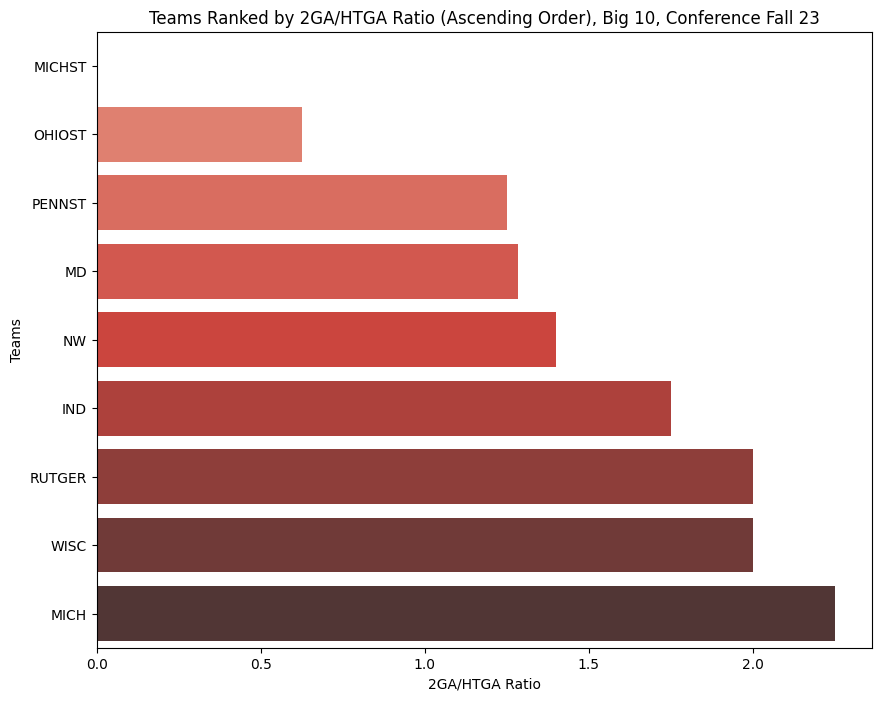

In [21]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Big_10_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Big_10_F23_conference_Merged.dropna(subset=['2GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Big_10_F23_conference_Merged_sorted = Big_10_F23_conference_Merged.sort_values('2GARatio', ascending = True)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GARatio', y='Teams', data=Big_10_F23_conference_Merged_sorted, palette='Reds_d')

plt.title('Teams Ranked by 2GA/HTGA Ratio (Ascending Order), Big 10, Conference Fall 23')
plt.xlabel('2GA/HTGA Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-22-2f0d0aefaaf2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GF/GARatio', y='Teams', data=Big_10_F23_conference_Merged_sorted, palette='Blues_d')


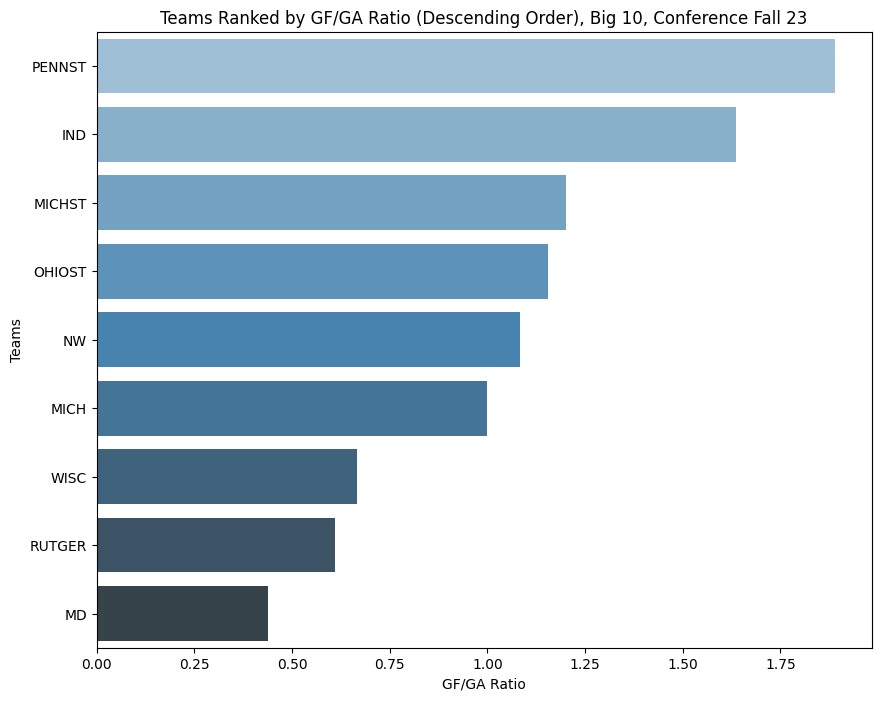

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,IND,4,2.0,2.0,3,5,5,7,6.0,8,2.0,13,6,8.0,11,18,11,4.0,11,7.0,7,7,7.0,0.0,-7.0,50.000000,85.714286,0.727273,0.728090,0.883212,0.500000,-0.383212,0.636364,1.750000,1.571429,0.571429,1.636364
1,MD,4,0.5,3.0,2,3,8,4,0.5,3,4.0,4,8,1.0,8,7,16,7.0,5,-2.0,-9,2,9.0,-7.0,-5.0,12.500000,12.500000,0.125000,0.160656,0.337838,0.047059,-0.290779,0.400000,1.285714,2.500000,0.777778,0.437500
2,MICH,6,2.5,2.0,7,6,10,4,3.0,3,2.0,7,3,5.5,10,13,13,4.0,10,6.0,0,3,9.0,-6.0,-12.0,41.666667,75.000000,0.550000,0.500000,0.862069,0.100000,-0.762069,0.300000,2.250000,3.333333,0.444444,1.000000
3,MICHST,4,3.0,5.0,0,6,3,5,2.0,1,5.0,6,7,5.0,9,12,10,10.0,1,-9.0,2,11,0.0,11.0,20.0,75.000000,40.000000,0.555556,0.590164,0.009901,1.000000,0.990099,11.000000,0.000000,0.090909,<NA>,1.200000
4,NW,4,1.5,2.0,2,5,7,5,3.0,3,3.0,8,5,4.5,9,13,12,5.0,5,0.0,1,8,7.0,1.0,1.0,37.500000,60.000000,0.500000,0.539936,0.500000,0.566372,0.066372,1.600000,1.400000,0.625000,0.714286,1.083333
5,OHIOST,7,4.5,6.0,4,11,9,3,1.5,1,2.0,4,4,6.0,10,15,13,8.0,5,-3.0,2,10,5.0,5.0,8.0,64.285714,50.000000,0.600000,0.571066,0.280899,0.800000,0.519101,2.000000,0.625000,0.500000,1.6,1.153846
6,PENNST,5,2.0,1.0,4,5,4,6,4.5,6,3.0,12,5,6.5,11,17,9,4.0,10,6.0,8,7,5.0,2.0,-4.0,40.000000,75.000000,0.590909,0.781081,0.862069,0.662162,-0.199907,0.700000,1.250000,1.428571,0.8,1.888889
7,RUTGER,5,1.0,5.0,4,6,13,4,2.5,3,1.0,5,5,3.5,9,11,18,6.0,7,1.0,-7,4,12.0,-8.0,-9.0,20.000000,62.500000,0.388889,0.271910,0.576471,0.100000,-0.476471,0.571429,2.000000,1.750000,0.5,0.611111
8,WISC,4,1.0,0.0,3,3,5,5,2.0,1,4.0,5,7,3.0,9,8,12,4.0,4,0.0,-4,4,8.0,-4.0,-4.0,25.000000,40.000000,0.333333,0.307692,0.500000,0.200000,-0.300000,1.000000,2.000000,1.000000,0.5,0.666667


In [22]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Big_10_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Big_10_F23_conference_Merged.dropna(subset=['GF/GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Big_10_F23_conference_Merged_sorted = Big_10_F23_conference_Merged.sort_values('GF/GARatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='GF/GARatio', y='Teams', data=Big_10_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by GF/GA Ratio (Descending Order), Big 10, Conference Fall 23')
plt.xlabel('GF/GA Ratio')
plt.ylabel('Teams')
plt.show()

Big_10_F23_conference_Merged

In [23]:
# For ALL matches (conference + non-conference)

Big_10_F23_Merged = pd.merge(Big_10_F23_Away,Big_10_F23_Home, on = ['Teams'])
Big_10_F23_Merged['W'] = Big_10_F23_Merged['awinvalue'] + Big_10_F23_Merged['hwinvalue']
Big_10_F23_Merged['G'] = Big_10_F23_Merged['Played Home_x'] + Big_10_F23_Merged['Played Home_y']
Big_10_F23_Merged['GF'] = Big_10_F23_Merged['Scored_x'] + Big_10_F23_Merged['Scored_y']
Big_10_F23_Merged['GA'] = Big_10_F23_Merged['Conceded_x'] + Big_10_F23_Merged['Conceded_y']
Big_10_F23_Merged['GD'] = Big_10_F23_Merged['GF'] - Big_10_F23_Merged['GA']
Big_10_F23_Merged['HTGA'] = Big_10_F23_Merged['HTAG_x'] + Big_10_F23_Merged['HTAG_y']
Big_10_F23_Merged['HTGF'] = Big_10_F23_Merged['HTHG_x'] + Big_10_F23_Merged['HTHG_y']
Big_10_F23_Merged['HTGD'] = Big_10_F23_Merged['HTGF'] - Big_10_F23_Merged['HTGA']
Big_10_F23_Merged['2GF'] = Big_10_F23_Merged['GF'] - Big_10_F23_Merged['HTGF']
Big_10_F23_Merged['2GA'] = Big_10_F23_Merged['GA'] - Big_10_F23_Merged['HTGA']
Big_10_F23_Merged['2GD'] = Big_10_F23_Merged['2GF'] - Big_10_F23_Merged['2GA']
Big_10_F23_Merged['Change_GD'] = Big_10_F23_Merged['2GD'] - Big_10_F23_Merged['HTGD']
Big_10_F23_Merged['awpc'] = Big_10_F23_Merged['awinvalue'] / Big_10_F23_Merged['Played Home_x']
Big_10_F23_Merged['hwpc'] = Big_10_F23_Merged['hwinvalue'] / Big_10_F23_Merged['Played Home_y']
Big_10_F23_Merged['wpc'] = Big_10_F23_Merged['W']/Big_10_F23_Merged['G']
Big_10_F23_Merged['pyth'] = Big_10_F23_Merged['GF']**2/(Big_10_F23_Merged['GF']**2 + Big_10_F23_Merged['GA']**2)
Big_10_F23_Merged['pyth_ht'] = Big_10_F23_Merged['HTGF']**2/(Big_10_F23_Merged['HTGF']**2 + Big_10_F23_Merged['HTGA']**2)
Big_10_F23_Merged['pyth_h2'] = Big_10_F23_Merged['2GF']**2/(Big_10_F23_Merged['2GF']**2 + Big_10_F23_Merged['2GA']**2)
Big_10_F23_Merged['pyth_diff'] = Big_10_F23_Merged['pyth_h2'] - Big_10_F23_Merged['pyth_ht']
Big_10_F23_Merged

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BGSU,2,0.0,0.0,2,0,4,1,1.0,1,0.0,2,1,1.0,3,2,5,-3,0.0,3,3.0,-1,5.0,-6.0,-9.0,0.000000,1.000000,0.333333,0.137931,1.000000,0.038462,-0.961538
1,BUTLER,1,0.0,0.0,1,0,1,1,0.0,0,0.0,0,1,0.0,2,0,2,-2,0.0,1,1.0,-1,2.0,-3.0,-4.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,-0.800000
2,DEPAUL,1,0.0,0.0,0,0,2,1,0.5,0,0.0,1,1,0.5,2,1,3,-2,0.0,0,0.0,1,3.0,-2.0,-2.0,0.000000,0.500000,0.250000,0.100000,NaN,0.100000,NaN
3,IND,7,3.0,4.0,6,7,8,13,11.0,12,2.0,21,7,14.0,20,28,15,13,6.0,18,12.0,10,9.0,1.0,-11.0,0.428571,0.846154,0.700000,0.777007,0.900000,0.552486,-0.347514
4,MD,5,0.5,4.0,4,4,10,10,5.0,7,8.0,16,13,5.5,15,20,23,-3,12.0,11,-1.0,9,11.0,-2.0,-1.0,0.100000,0.500000,0.366667,0.430571,0.456604,0.400990,-0.055614
5,MICH,9,2.5,3.0,11,9,17,9,6.0,5,4.0,14,10,8.5,18,23,27,-4,7.0,16,9.0,7,20.0,-13.0,-22.0,0.277778,0.666667,0.472222,0.420509,0.839344,0.109131,-0.730213
6,MICHST,7,5.5,8.0,2,10,5,9,5.0,3,7.0,13,10,10.5,16,23,15,8,15.0,5,-10.0,18,0.0,18.0,28.0,0.785714,0.555556,0.656250,0.701592,0.100000,1.000000,0.900000
7,MILWKE,1,0.0,0.0,0,1,2,1,0.0,1,1.0,1,2,0.0,2,2,4,-2,1.0,1,0.0,1,3.0,-2.0,-2.0,0.000000,0.000000,0.000000,0.200000,0.500000,0.100000,-0.400000
8,N DAME,1,1.0,1.0,0,3,0,2,0.5,1,2.0,1,2,1.5,3,4,2,2,3.0,1,-2.0,3,-1.0,4.0,6.0,1.000000,0.250000,0.500000,0.800000,0.100000,0.900000,0.800000
9,NOVA,1,0.0,3.0,3,4,6,1,0.5,1,1.0,1,1,0.5,2,5,7,-2,4.0,4,0.0,1,3.0,-2.0,-2.0,0.000000,0.500000,0.250000,0.337838,0.500000,0.100000,-0.400000


In [24]:
# List of teams to drop
teams_to_drop = ['IND','MD','MICH','MICHST','NW','OHIOST','PENNST','RUTGER','WISC']  # Replace these with the actual team names you want to drop

# Drop the specified teams
Big_10_F23_Merged = Big_10_F23_Merged[Big_10_F23_Merged['Teams'].isin(teams_to_drop)]

# Display the updated DataFrame
Big_10_F23_Merged

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
3,IND,7,3.0,4.0,6,7,8,13,11.0,12,2.0,21,7,14.0,20,28,15,13,6.0,18,12.0,10,9.0,1.0,-11.0,0.428571,0.846154,0.700000,0.777007,0.900000,0.552486,-0.347514
4,MD,5,0.5,4.0,4,4,10,10,5.0,7,8.0,16,13,5.5,15,20,23,-3,12.0,11,-1.0,9,11.0,-2.0,-1.0,0.100000,0.500000,0.366667,0.430571,0.456604,0.400990,-0.055614
5,MICH,9,2.5,3.0,11,9,17,9,6.0,5,4.0,14,10,8.5,18,23,27,-4,7.0,16,9.0,7,20.0,-13.0,-22.0,0.277778,0.666667,0.472222,0.420509,0.839344,0.109131,-0.730213
6,MICHST,7,5.5,8.0,2,10,5,9,5.0,3,7.0,13,10,10.5,16,23,15,8,15.0,5,-10.0,18,0.0,18.0,28.0,0.785714,0.555556,0.656250,0.701592,0.100000,1.000000,0.900000
10,NW,6,3.0,3.0,3,8,9,11,8.5,8,5.0,19,8,11.5,17,27,17,10,8.0,11,3.0,16,9.0,7.0,4.0,0.500000,0.772727,0.676471,0.716110,0.654054,0.759644,0.105590
12,OHIOST,9,6.0,6.0,5,14,11,9,4.0,2,4.0,10,9,10.0,18,24,20,4,10.0,7,-3.0,17,10.0,7.0,10.0,0.666667,0.444444,0.555556,0.590164,0.328859,0.742931,0.414072
13,PENNST,7,3.5,3.0,4,8,5,12,9.0,10,4.0,25,10,12.5,19,33,15,18,7.0,14,7.0,19,8.0,11.0,4.0,0.500000,0.750000,0.657895,0.828767,0.800000,0.849412,0.049412
14,RUTGER,9,1.5,7.0,8,13,26,7,5.0,4,3.0,11,7,6.5,16,24,33,-9,10.0,12,2.0,12,23.0,-11.0,-13.0,0.166667,0.714286,0.406250,0.345946,0.590164,0.213967,-0.376197
18,WISC,6,1.0,1.0,6,4,10,11,7.0,2,5.0,12,9,8.0,17,16,19,-3,6.0,8,2.0,8,13.0,-5.0,-7.0,0.166667,0.636364,0.470588,0.414911,0.640000,0.274678,-0.365322


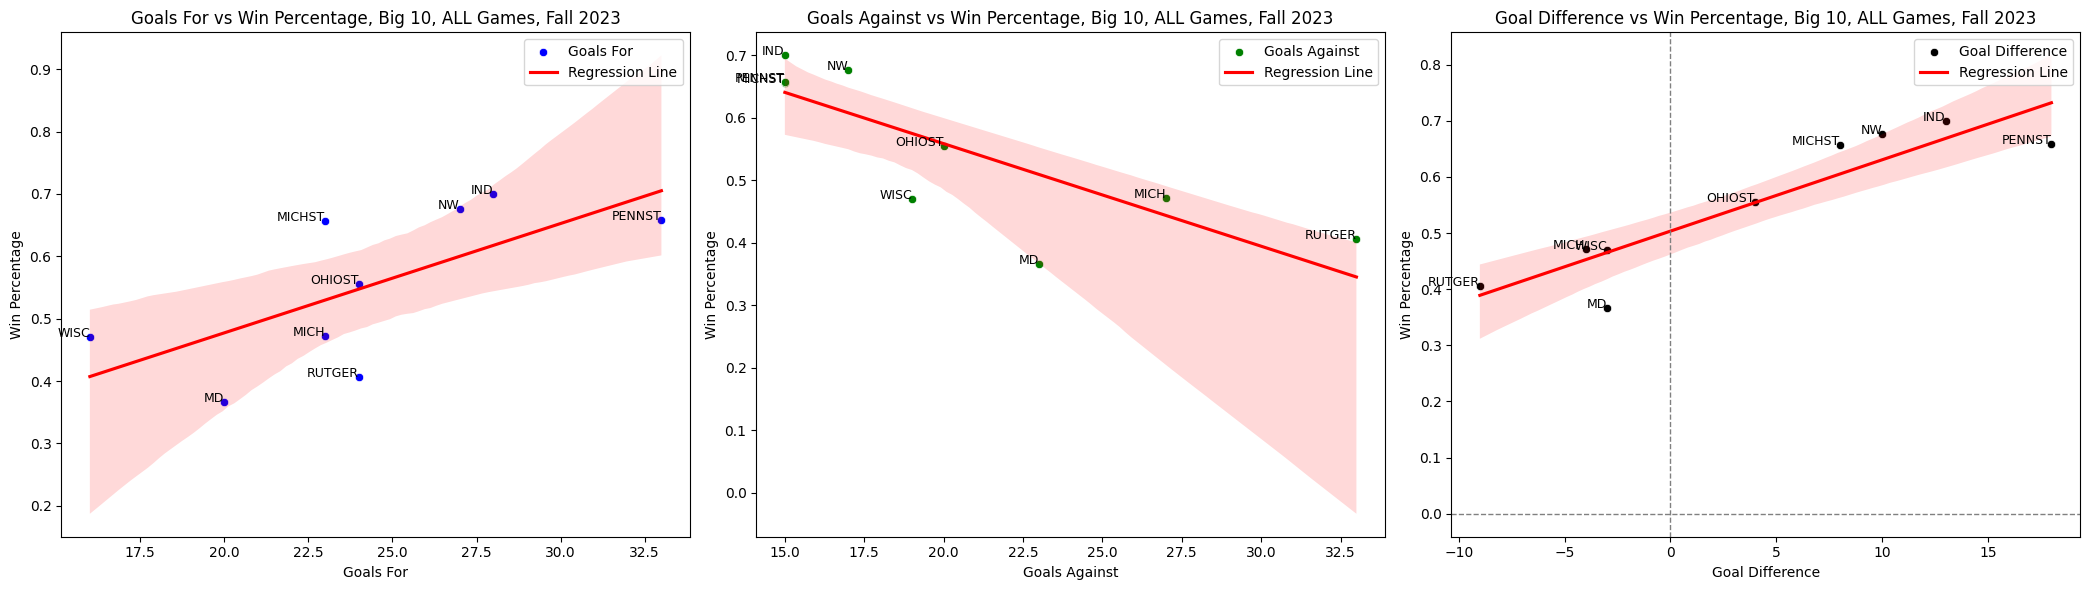

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='GF ~ wpc', data=Big_10_F23_Merged).fit()
ga_lm = smf.ols(formula='GA ~ wpc', data=Big_10_F23_Merged).fit()
gdf_lm = smf.ols(formula='GD ~ wpc', data=Big_10_F23_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='GF', y='wpc', data=Big_10_F23_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='GF', y='wpc', data=Big_10_F23_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Goals For vs Win Percentage, Big 10, ALL Games, Fall 2023')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for index, row in Big_10_F23_Merged.iterrows():
    axes[0].text(row['GF'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='GA', y='wpc', data=Big_10_F23_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='GA', y='wpc', data=Big_10_F23_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Goals Against vs Win Percentage, Big 10, ALL Games, Fall 2023')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for index, row in Big_10_F23_Merged.iterrows():
    axes[1].text(row['GA'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')


axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='GD', y='wpc', data=Big_10_F23_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='GD', y='wpc', data=Big_10_F23_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Goal Difference vs Win Percentage, Big 10, ALL Games, Fall 2023')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for index, row in Big_10_F23_Merged.iterrows():
    axes[2].text(row['GD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[2].legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Show the plots
plt.tight_layout()
plt.show()


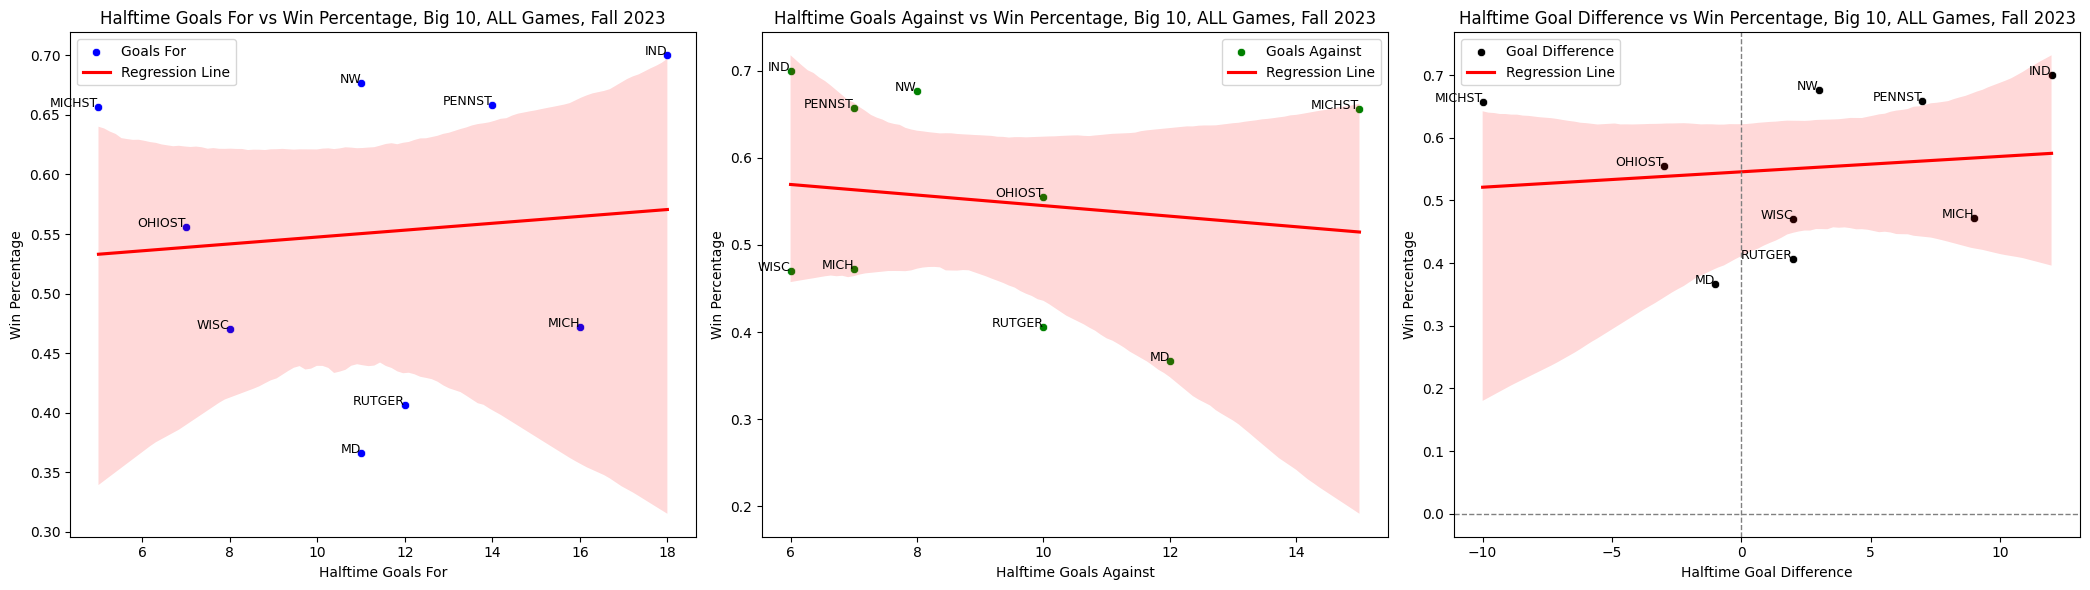

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='HTGF ~ wpc', data=Big_10_F23_Merged).fit()
ga_lm = smf.ols(formula='HTGA ~ wpc', data=Big_10_F23_Merged).fit()
gdf_lm = smf.ols(formula='HTGD ~ wpc', data=Big_10_F23_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='HTGF', y='wpc', data=Big_10_F23_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='HTGF', y='wpc', data=Big_10_F23_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Halftime Goals For vs Win Percentage, Big 10, ALL Games, Fall 2023')
axes[0].set_xlabel('Halftime Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for index, row in Big_10_F23_Merged.iterrows():
    axes[0].text(row['HTGF'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='HTGA', y='wpc', data=Big_10_F23_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='HTGA', y='wpc', data=Big_10_F23_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Halftime Goals Against vs Win Percentage, Big 10, ALL Games, Fall 2023')
axes[1].set_xlabel('Halftime Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for index, row in Big_10_F23_Merged.iterrows():
    axes[1].text(row['HTGA'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')


axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='HTGD', y='wpc', data=Big_10_F23_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='HTGD', y='wpc', data=Big_10_F23_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Halftime Goal Difference vs Win Percentage, Big 10, ALL Games, Fall 2023')
axes[2].set_xlabel('Halftime Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for index, row in Big_10_F23_Merged.iterrows():
    axes[2].text(row['HTGD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[2].legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Show the plots
plt.tight_layout()
plt.show()

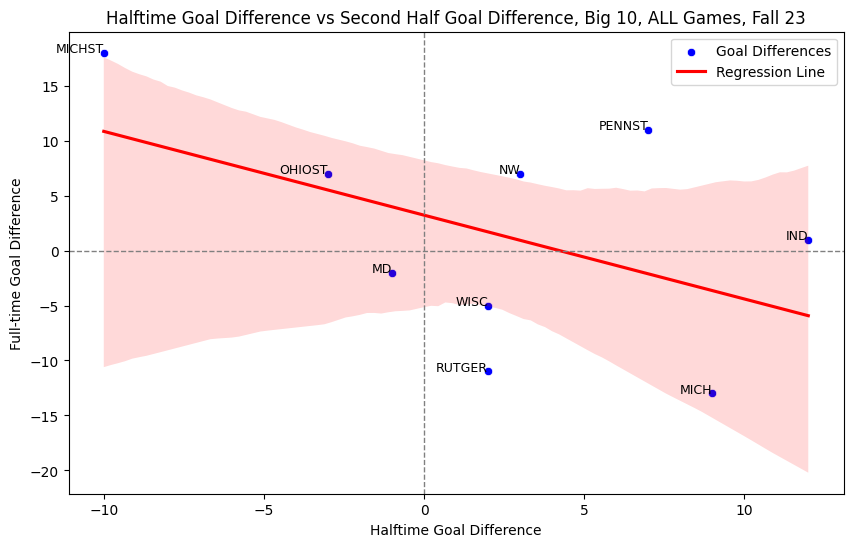

In [31]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='2GD', data=Big_10_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGD', y='2GD', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['HTGD'],
                 row['2GD'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('Halftime Goal Difference vs Second Half Goal Difference, Big 10, ALL Games, Fall 23')
plt.xlabel('Halftime Goal Difference')
plt.ylabel('Full-time Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

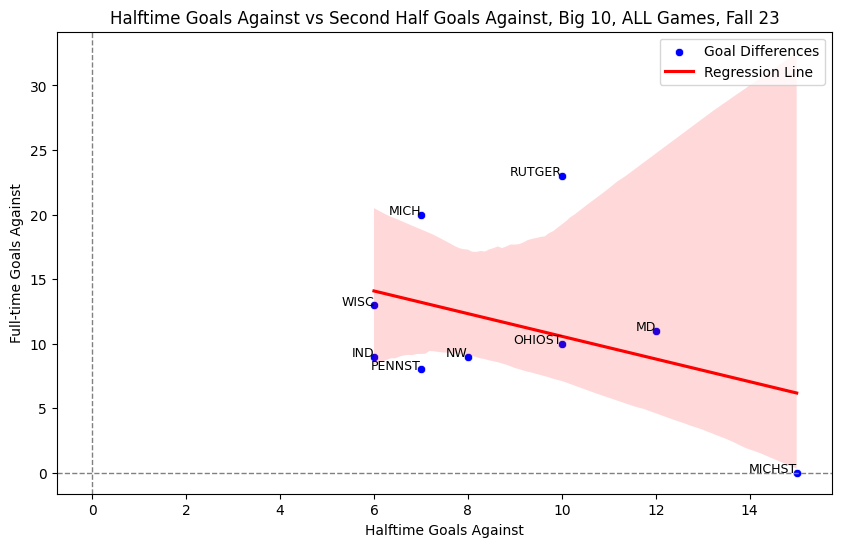

In [32]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGA', y='2GA', data=Big_10_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGA', y='2GA', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['HTGA'],
                 row['2GA'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('Halftime Goals Against vs Second Half Goals Against, Big 10, ALL Games, Fall 23')
plt.xlabel('Halftime Goals Against')
plt.ylabel('Full-time Goals Against')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

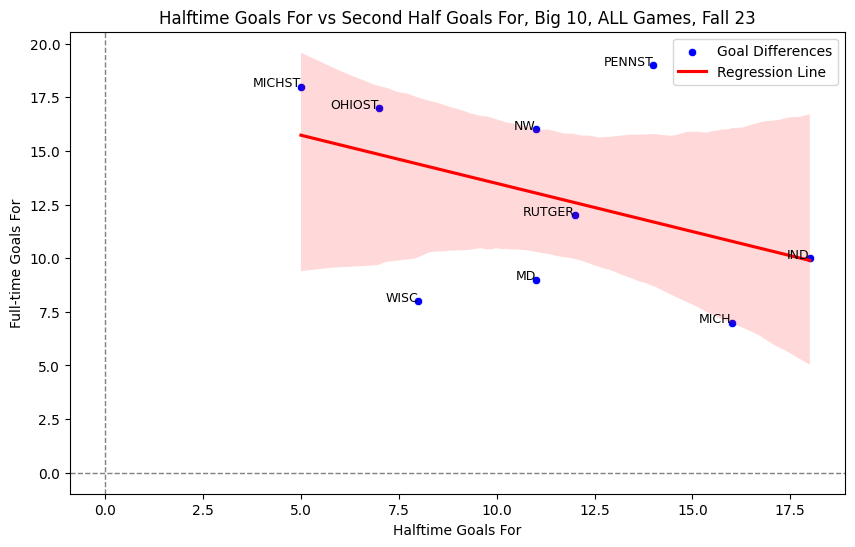

In [33]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGF', y='2GF', data=Big_10_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGF', y='2GF', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['HTGF'],
                 row['2GF'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('Halftime Goals For vs Second Half Goals For, Big 10, ALL Games, Fall 23')
plt.xlabel('Halftime Goals For')
plt.ylabel('Full-time Goals For')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

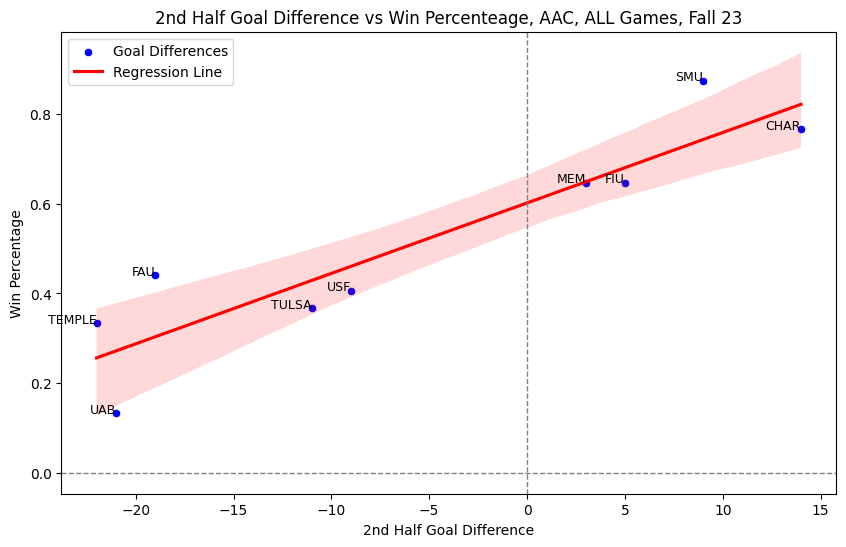

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2GD', y='wpc', data=Big_10_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='2GD', y='wpc', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['2GD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('2nd Half Goal Difference vs Win Percenteage, Big_10, ALL Games, Fall 23')
plt.xlabel('2nd Half Goal Difference')
plt.ylabel('Win Percentage')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

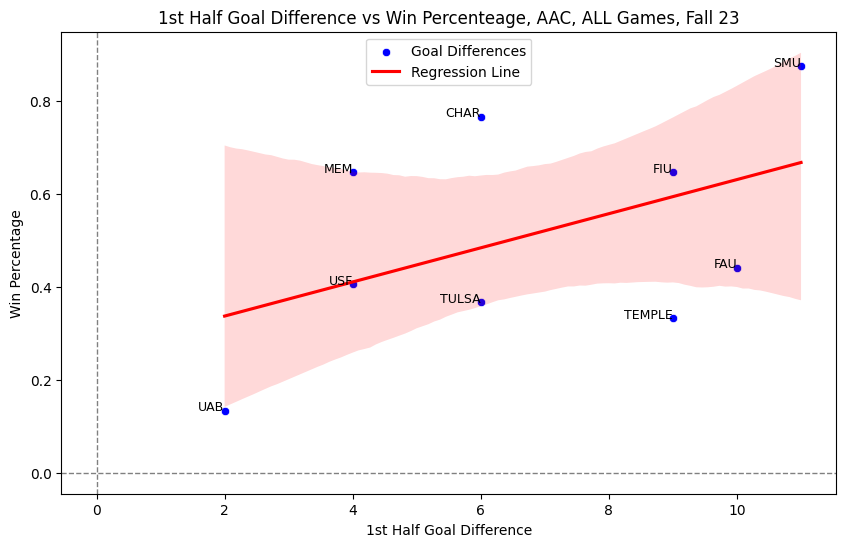

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='wpc', data=Big_10_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGD', y='wpc', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['HTGD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('1st Half Goal Difference vs Win Percenteage, Big_10, ALL Games, Fall 23')
plt.xlabel('1st Half Goal Difference')
plt.ylabel('Win Percentage')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
# Change in Goal Difference
Big_10_F23_Merged['Change_GD'] = Big_10_F23_Merged['2GD'] - Big_10_F23_Merged['HTGD']
print(Big_10_F23_Merged[['HTGD', '2GD', 'Change_GD']].describe())

            HTGD        2GD  Change_GD
count   9.000000   9.000000   9.000000
mean    6.777778  -5.666667 -12.444444
std     3.113590  13.738632  13.602492
min     2.000000 -22.000000 -31.000000
25%     4.000000 -19.000000 -23.000000
50%     6.000000  -9.000000 -13.000000
75%     9.000000   5.000000  -2.000000
max    11.000000  14.000000   8.000000


<ipython-input-19-7192c08a7236>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAC_F23_Merged['Change_GD'] = AAC_F23_Merged['2GD'] - AAC_F23_Merged['HTGD']


The chart above suggest that Tulsa, alongside USF, FAU, Temple, and UAB, tends to perform well in the first half but loses its advantage in the second half.

In [ ]:
print('Big_10 Correlation Matrices:')
# Calculate the correlation matrix
correlation_matrix = Big_10_F23_Merged[['HTGD', 'GD']].corr()
print("correlation matrix HTGD vs GD: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = Big_10_F23_Merged[['GF', 'wpc']].corr()
print("correlation matrix GF vs wpc: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = Big_10_F23_Merged[['GA', 'wpc']].corr()
print("correlation matrix GA vs wpc: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = Big_10_F23_Merged[['GD', 'wpc']].corr()
print("correlation matrix GD vs wpc: " )
print(correlation_matrix)

correlation_matrix = Big_10_F23_Merged[['HTGD', 'wpc']].corr()
print("correlation matrix HTGD vs wpc: " )
print(correlation_matrix)
correlation_matrix = Big_10_F23_Merged[['2GD', 'wpc']].corr()
print("correlation matrix HTGD vs GD: " )
print(correlation_matrix)

AAC Correlation Matrices:
correlation matrix HTGD vs GD: 
          HTGD        GD
HTGD  1.000000  0.361935
GD    0.361935  1.000000
correlation matrix GF vs wpc: 
           GF       wpc
GF   1.000000  0.922966
wpc  0.922966  1.000000
correlation matrix GA vs wpc: 
           GA       wpc
GA   1.000000 -0.888033
wpc -0.888033  1.000000
correlation matrix GD vs wpc: 
           GD       wpc
GD   1.000000  0.967423
wpc  0.967423  1.000000
correlation matrix HTGD vs wpc: 
          HTGD       wpc
HTGD  1.000000  0.484782
wpc   0.484782  1.000000
correlation matrix HTGD vs GD: 
          2GD       wpc
2GD  1.000000  0.915074
wpc  0.915074  1.000000


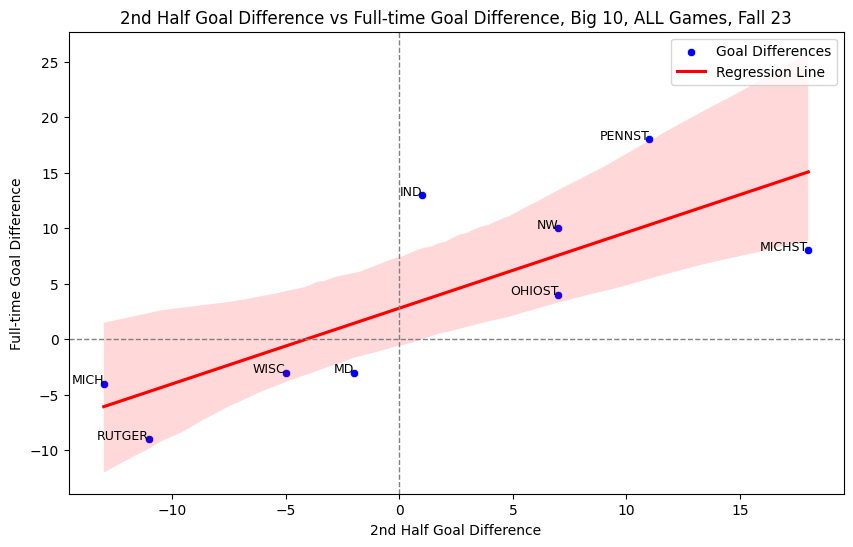

In [35]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2GD', y='GD', data=Big_10_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='2GD', y='GD', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['2GD'],
                 row['GD'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('2nd Half Goal Difference vs Full-time Goal Difference, Big 10, ALL Games, Fall 23')
plt.xlabel('2nd Half Goal Difference')
plt.ylabel('Full-time Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = Big_10_F23_Merged[['2GD', 'GD']].corr()
print("correlation matrix: " )
print(correlation_matrix)

correlation matrix: 
          2GD        GD
2GD  1.000000  0.977429
GD   0.977429  1.000000


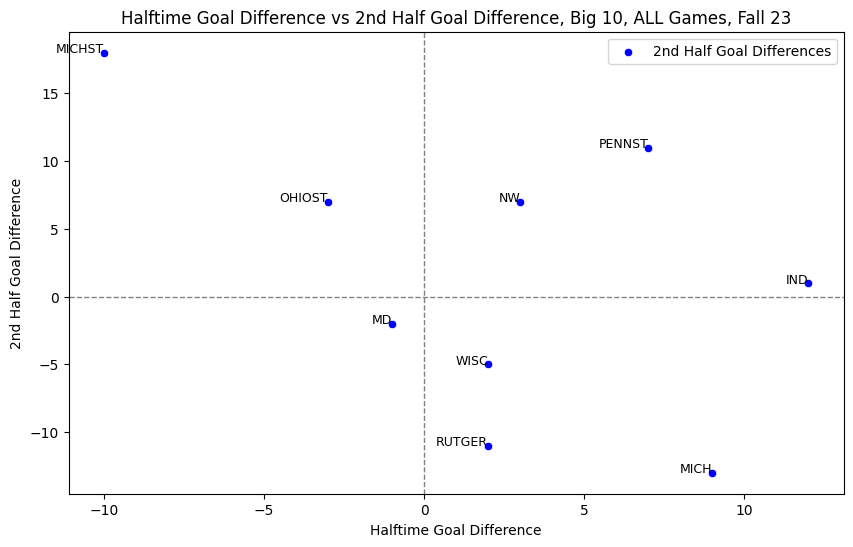

In [37]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='2GD', data=Big_10_F23_Merged, color='blue', label='2nd Half Goal Differences')
# sns.regplot(x='HTGD', y='2GD', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['HTGD'], row['2GD'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal Difference vs 2nd Half Goal Difference, Big 10, ALL Games, Fall 23')
plt.xlabel('Halftime Goal Difference')
plt.ylabel('2nd Half Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

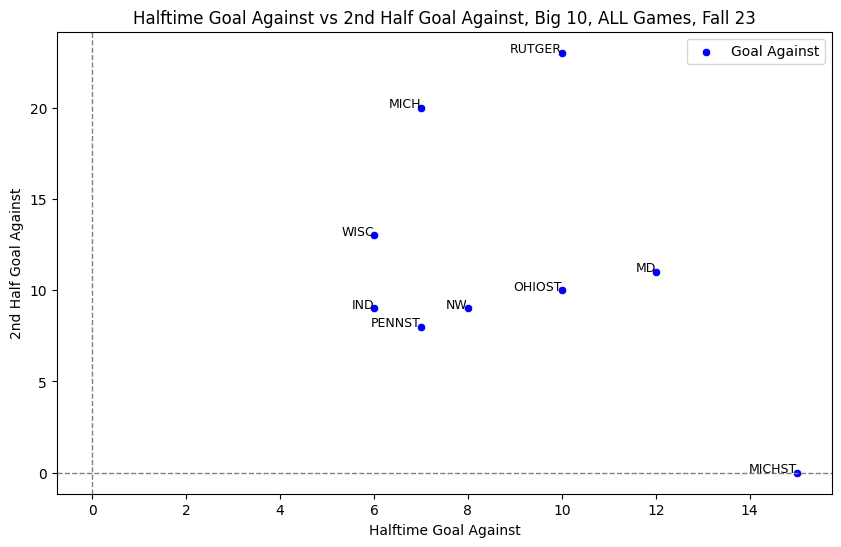

In [39]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGA', y='2GA', data=Big_10_F23_Merged, color='blue', label='Goal Against')
# sns.regplot(x='HTGD', y='2GD', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['HTGA'], row['2GA'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal Against vs 2nd Half Goal Against, Big 10, ALL Games, Fall 23')
plt.xlabel('Halftime Goal Against')
plt.ylabel('2nd Half Goal Against')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

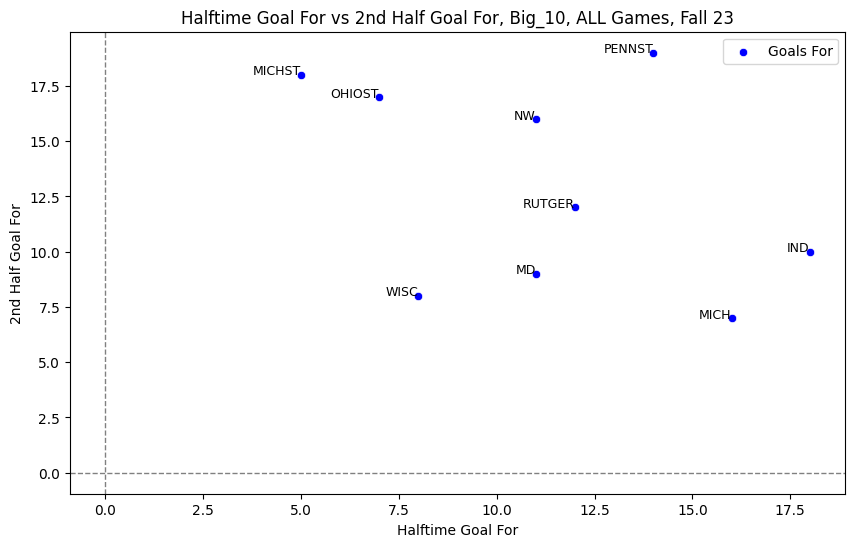

In [40]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGF', y='2GF', data=Big_10_F23_Merged, color='blue', label='Goals For')
# sns.regplot(x='HTGD', y='2GD', data=Big_10_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in Big_10_F23_Merged.iterrows():
    plt.text(row['HTGF'], row['2GF'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal For vs 2nd Half Goal For, Big_10, ALL Games, Fall 23')
plt.xlabel('Halftime Goal For')
plt.ylabel('2nd Half Goal For')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [42]:
Big_10_F23_Merged['2GFRatio'] = Big_10_F23_Merged['2GF'] / Big_10_F23_Merged['HTGF']
Big_10_F23_Merged['2GARatio'] = Big_10_F23_Merged['2GA'] / Big_10_F23_Merged['HTGA']
Big_10_F23_Merged['1GFRatio'] = Big_10_F23_Merged['HTGF'] / Big_10_F23_Merged['2GF']
Big_10_F23_Merged['1GARatio'] = Big_10_F23_Merged['HTGA'] / Big_10_F23_Merged['2GA']
Big_10_F23_Merged['GF/GARatio'] = Big_10_F23_Merged['GF'] / Big_10_F23_Merged['GA']
Big_10_F23_Merged

<ipython-input-42-3607fcdedf74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_10_F23_Merged['2GFRatio'] = Big_10_F23_Merged['2GF'] / Big_10_F23_Merged['HTGF']
<ipython-input-42-3607fcdedf74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_10_F23_Merged['2GARatio'] = Big_10_F23_Merged['2GA'] / Big_10_F23_Merged['HTGA']
<ipython-input-42-3607fcdedf74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
3,IND,7,3.0,4.0,6,7,8,13,11.0,12,2.0,21,7,14.0,20,28,15,13,6.0,18,12.0,10,9.0,1.0,-11.0,0.428571,0.846154,0.700000,0.777007,0.900000,0.552486,-0.347514,0.555556,1.500000,1.800000,0.666667,1.866667
4,MD,5,0.5,4.0,4,4,10,10,5.0,7,8.0,16,13,5.5,15,20,23,-3,12.0,11,-1.0,9,11.0,-2.0,-1.0,0.100000,0.500000,0.366667,0.430571,0.456604,0.400990,-0.055614,0.818182,0.916667,1.222222,1.090909,0.869565
5,MICH,9,2.5,3.0,11,9,17,9,6.0,5,4.0,14,10,8.5,18,23,27,-4,7.0,16,9.0,7,20.0,-13.0,-22.0,0.277778,0.666667,0.472222,0.420509,0.839344,0.109131,-0.730213,0.437500,2.857143,2.285714,0.350000,0.851852
6,MICHST,7,5.5,8.0,2,10,5,9,5.0,3,7.0,13,10,10.5,16,23,15,8,15.0,5,-10.0,18,0.0,18.0,28.0,0.785714,0.555556,0.656250,0.701592,0.100000,1.000000,0.900000,3.600000,0.000000,0.277778,inf,1.533333
10,NW,6,3.0,3.0,3,8,9,11,8.5,8,5.0,19,8,11.5,17,27,17,10,8.0,11,3.0,16,9.0,7.0,4.0,0.500000,0.772727,0.676471,0.716110,0.654054,0.759644,0.105590,1.454545,1.125000,0.687500,0.888889,1.588235
12,OHIOST,9,6.0,6.0,5,14,11,9,4.0,2,4.0,10,9,10.0,18,24,20,4,10.0,7,-3.0,17,10.0,7.0,10.0,0.666667,0.444444,0.555556,0.590164,0.328859,0.742931,0.414072,2.428571,1.000000,0.411765,1.000000,1.200000
13,PENNST,7,3.5,3.0,4,8,5,12,9.0,10,4.0,25,10,12.5,19,33,15,18,7.0,14,7.0,19,8.0,11.0,4.0,0.500000,0.750000,0.657895,0.828767,0.800000,0.849412,0.049412,1.357143,1.142857,0.736842,0.875000,2.200000
14,RUTGER,9,1.5,7.0,8,13,26,7,5.0,4,3.0,11,7,6.5,16,24,33,-9,10.0,12,2.0,12,23.0,-11.0,-13.0,0.166667,0.714286,0.406250,0.345946,0.590164,0.213967,-0.376197,1.000000,2.300000,1.000000,0.434783,0.727273
18,WISC,6,1.0,1.0,6,4,10,11,7.0,2,5.0,12,9,8.0,17,16,19,-3,6.0,8,2.0,8,13.0,-5.0,-7.0,0.166667,0.636364,0.470588,0.414911,0.640000,0.274678,-0.365322,1.000000,2.166667,1.000000,0.461538,0.842105


<ipython-input-43-9e9e9adeaf2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_10_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-43-9e9e9adeaf2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_10_F23_Merged.dropna(subset=['2GFRatio'], inplace=True)
<ipython-input-43-9e9e9adeaf2d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GFRatio', y='Teams', data=Big_10_F23_Merged_sorted, palette='Blues_d')


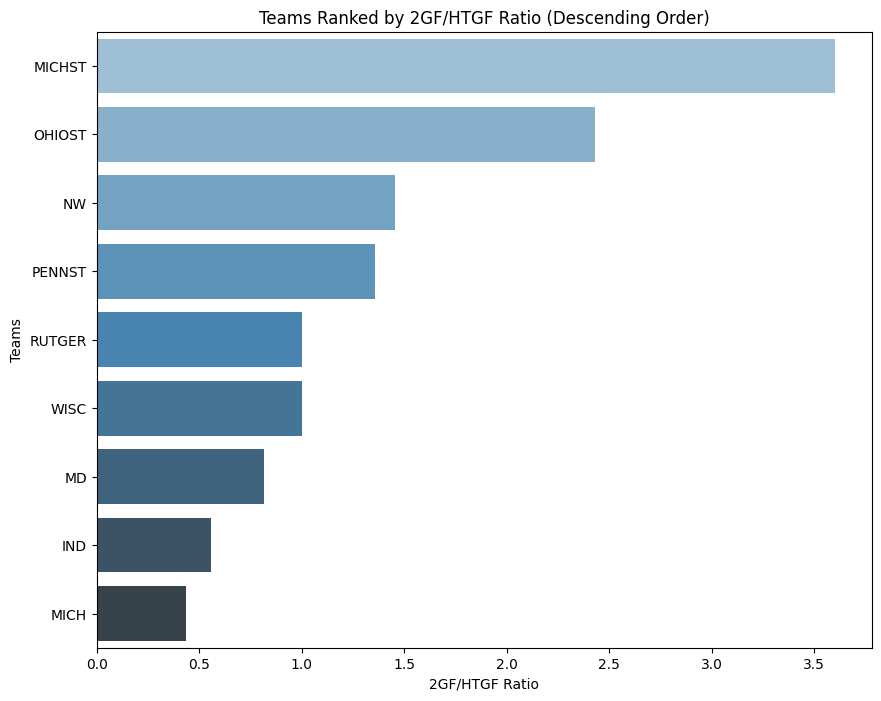

In [43]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Big_10_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Big_10_F23_Merged.dropna(subset=['2GFRatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Big_10_F23_Merged_sorted = Big_10_F23_Merged.sort_values('2GFRatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GFRatio', y='Teams', data=Big_10_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by 2GF/HTGF Ratio (Descending Order)')
plt.xlabel('2GF/HTGF Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-44-e41c77af0ac3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_10_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-44-e41c77af0ac3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_10_F23_Merged.dropna(subset=['2GARatio'], inplace=True)
<ipython-input-44-e41c77af0ac3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GARatio', y='Teams', data=Big_10_F23_Merged_sorted, palette='Reds_d')


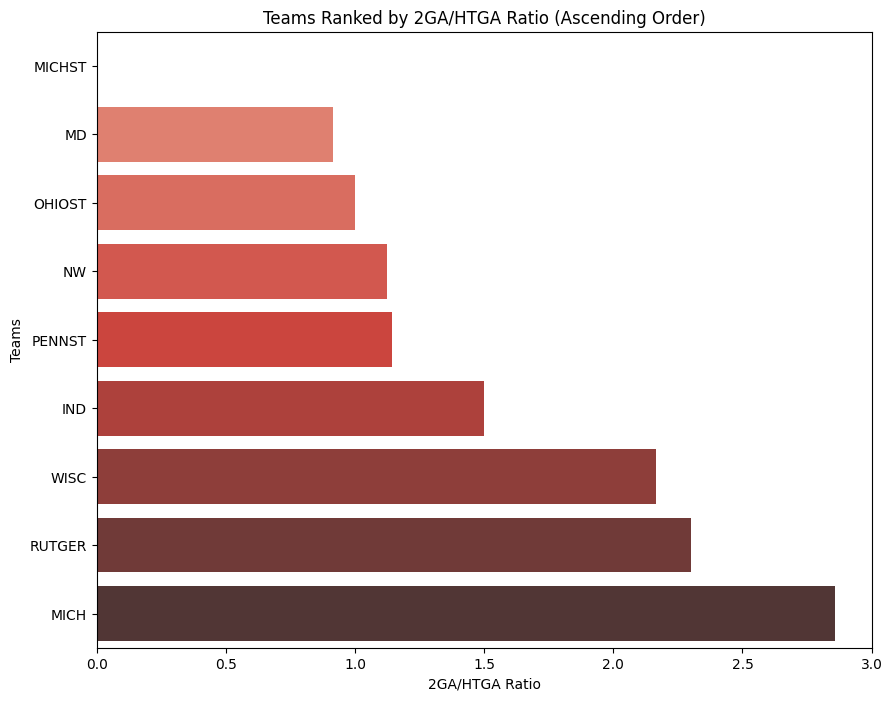

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
6,MICHST,7,5.5,8.0,2,10,5,9,5.0,3,7.0,13,10,10.5,16,23,15,8,15.0,5,-10.0,18,0.0,18.0,28.0,0.785714,0.555556,0.656250,0.701592,0.100000,1.000000,0.900000,3.600000,0.000000,0.277778,<NA>,1.533333
4,MD,5,0.5,4.0,4,4,10,10,5.0,7,8.0,16,13,5.5,15,20,23,-3,12.0,11,-1.0,9,11.0,-2.0,-1.0,0.100000,0.500000,0.366667,0.430571,0.456604,0.400990,-0.055614,0.818182,0.916667,1.222222,1.090909,0.869565
12,OHIOST,9,6.0,6.0,5,14,11,9,4.0,2,4.0,10,9,10.0,18,24,20,4,10.0,7,-3.0,17,10.0,7.0,10.0,0.666667,0.444444,0.555556,0.590164,0.328859,0.742931,0.414072,2.428571,1.000000,0.411765,1.0,1.200000
10,NW,6,3.0,3.0,3,8,9,11,8.5,8,5.0,19,8,11.5,17,27,17,10,8.0,11,3.0,16,9.0,7.0,4.0,0.500000,0.772727,0.676471,0.716110,0.654054,0.759644,0.105590,1.454545,1.125000,0.687500,0.888889,1.588235
13,PENNST,7,3.5,3.0,4,8,5,12,9.0,10,4.0,25,10,12.5,19,33,15,18,7.0,14,7.0,19,8.0,11.0,4.0,0.500000,0.750000,0.657895,0.828767,0.800000,0.849412,0.049412,1.357143,1.142857,0.736842,0.875,2.200000
3,IND,7,3.0,4.0,6,7,8,13,11.0,12,2.0,21,7,14.0,20,28,15,13,6.0,18,12.0,10,9.0,1.0,-11.0,0.428571,0.846154,0.700000,0.777007,0.900000,0.552486,-0.347514,0.555556,1.500000,1.800000,0.666667,1.866667
18,WISC,6,1.0,1.0,6,4,10,11,7.0,2,5.0,12,9,8.0,17,16,19,-3,6.0,8,2.0,8,13.0,-5.0,-7.0,0.166667,0.636364,0.470588,0.414911,0.640000,0.274678,-0.365322,1.000000,2.166667,1.000000,0.461538,0.842105
14,RUTGER,9,1.5,7.0,8,13,26,7,5.0,4,3.0,11,7,6.5,16,24,33,-9,10.0,12,2.0,12,23.0,-11.0,-13.0,0.166667,0.714286,0.406250,0.345946,0.590164,0.213967,-0.376197,1.000000,2.300000,1.000000,0.434783,0.727273
5,MICH,9,2.5,3.0,11,9,17,9,6.0,5,4.0,14,10,8.5,18,23,27,-4,7.0,16,9.0,7,20.0,-13.0,-22.0,0.277778,0.666667,0.472222,0.420509,0.839344,0.109131,-0.730213,0.437500,2.857143,2.285714,0.35,0.851852


In [44]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Big_10_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Big_10_F23_Merged.dropna(subset=['2GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Big_10_F23_Merged_sorted = Big_10_F23_Merged.sort_values('2GARatio', ascending = True)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GARatio', y='Teams', data=Big_10_F23_Merged_sorted, palette='Reds_d')

plt.title('Teams Ranked by 2GA/HTGA Ratio (Ascending Order)')
plt.xlabel('2GA/HTGA Ratio')
plt.ylabel('Teams')
plt.show()

Big_10_F23_Merged_sorted

<ipython-input-45-d66378ab327a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_10_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-45-d66378ab327a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Big_10_F23_Merged.dropna(subset=['GF/GARatio'], inplace=True)
<ipython-input-45-d66378ab327a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GF/GARatio', y='Teams', data=Big_10_F23_Merged_sorted, palette='Blues_d')


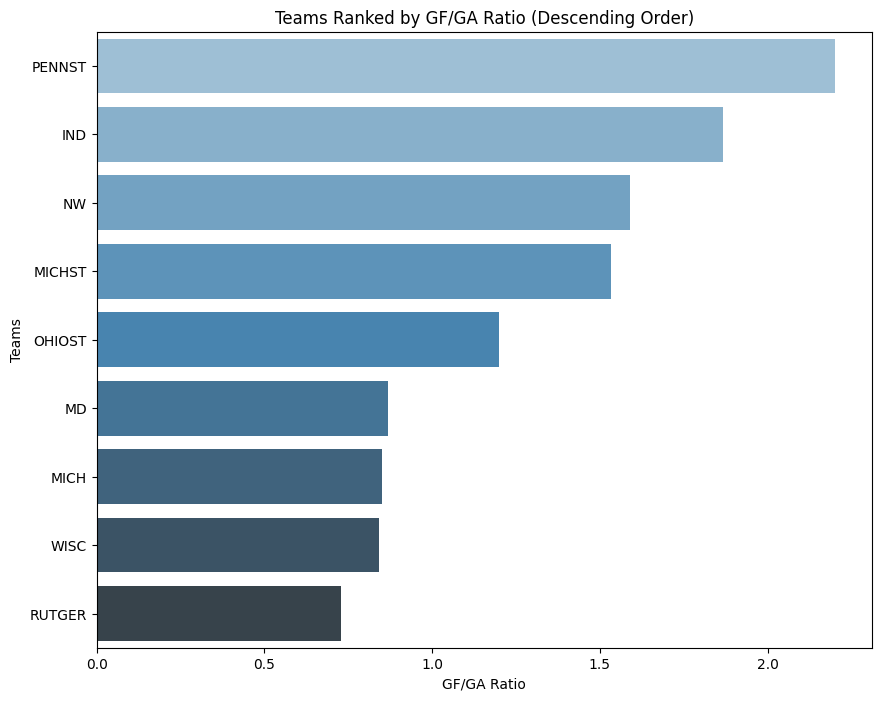

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
13,PENNST,7,3.5,3.0,4,8,5,12,9.0,10,4.0,25,10,12.5,19,33,15,18,7.0,14,7.0,19,8.0,11.0,4.0,0.500000,0.750000,0.657895,0.828767,0.800000,0.849412,0.049412,1.357143,1.142857,0.736842,0.875,2.200000
3,IND,7,3.0,4.0,6,7,8,13,11.0,12,2.0,21,7,14.0,20,28,15,13,6.0,18,12.0,10,9.0,1.0,-11.0,0.428571,0.846154,0.700000,0.777007,0.900000,0.552486,-0.347514,0.555556,1.500000,1.800000,0.666667,1.866667
10,NW,6,3.0,3.0,3,8,9,11,8.5,8,5.0,19,8,11.5,17,27,17,10,8.0,11,3.0,16,9.0,7.0,4.0,0.500000,0.772727,0.676471,0.716110,0.654054,0.759644,0.105590,1.454545,1.125000,0.687500,0.888889,1.588235
6,MICHST,7,5.5,8.0,2,10,5,9,5.0,3,7.0,13,10,10.5,16,23,15,8,15.0,5,-10.0,18,0.0,18.0,28.0,0.785714,0.555556,0.656250,0.701592,0.100000,1.000000,0.900000,3.600000,0.000000,0.277778,<NA>,1.533333
12,OHIOST,9,6.0,6.0,5,14,11,9,4.0,2,4.0,10,9,10.0,18,24,20,4,10.0,7,-3.0,17,10.0,7.0,10.0,0.666667,0.444444,0.555556,0.590164,0.328859,0.742931,0.414072,2.428571,1.000000,0.411765,1.0,1.200000
4,MD,5,0.5,4.0,4,4,10,10,5.0,7,8.0,16,13,5.5,15,20,23,-3,12.0,11,-1.0,9,11.0,-2.0,-1.0,0.100000,0.500000,0.366667,0.430571,0.456604,0.400990,-0.055614,0.818182,0.916667,1.222222,1.090909,0.869565
5,MICH,9,2.5,3.0,11,9,17,9,6.0,5,4.0,14,10,8.5,18,23,27,-4,7.0,16,9.0,7,20.0,-13.0,-22.0,0.277778,0.666667,0.472222,0.420509,0.839344,0.109131,-0.730213,0.437500,2.857143,2.285714,0.35,0.851852
18,WISC,6,1.0,1.0,6,4,10,11,7.0,2,5.0,12,9,8.0,17,16,19,-3,6.0,8,2.0,8,13.0,-5.0,-7.0,0.166667,0.636364,0.470588,0.414911,0.640000,0.274678,-0.365322,1.000000,2.166667,1.000000,0.461538,0.842105
14,RUTGER,9,1.5,7.0,8,13,26,7,5.0,4,3.0,11,7,6.5,16,24,33,-9,10.0,12,2.0,12,23.0,-11.0,-13.0,0.166667,0.714286,0.406250,0.345946,0.590164,0.213967,-0.376197,1.000000,2.300000,1.000000,0.434783,0.727273


In [45]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
Big_10_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
Big_10_F23_Merged.dropna(subset=['GF/GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
Big_10_F23_Merged_sorted = Big_10_F23_Merged.sort_values('GF/GARatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='GF/GARatio', y='Teams', data=Big_10_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by GF/GA Ratio (Descending Order)')
plt.xlabel('GF/GA Ratio')
plt.ylabel('Teams')
plt.show()

Big_10_F23_Merged_sorted

In [ ]:
Big_10_F23_Merged

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,GFRatio,GARatio,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
2,CHAR,6,4.0,3,2,8,4,9,7.5,8,1,23,7,11.5,15,31,11,20,4,10,6,21,0.437500,14,8,0.666667,0.833333,0.766667,0.888170,0.862069,0.900000,0.037931,2.100000,0.109375,2.100000,0.109375,0.47619,9.142857,2.818182
3,FAU,11,3.0,4,12,14,27,6,4.5,3,1,8,4,7.5,17,22,31,-9,5,15,10,7,1.040000,-19,-29,0.272727,0.750000,0.441176,0.334948,0.900000,0.067586,-0.832414,0.466667,0.208000,0.466667,0.208000,2.142857,4.807692,0.709677
5,FIU,8,5.0,3,7,11,10,9,6.0,10,5,21,8,11.0,17,32,18,14,8,17,9,15,0.156250,5,-4,0.625000,0.666667,0.647059,0.759644,0.818697,0.692308,-0.126389,0.882353,0.019531,0.882353,0.019531,1.133333,51.200000,1.777778
8,MEM,10,5.5,4,2,13,11,7,5.5,9,3,15,10,11.0,17,28,21,7,7,11,4,17,0.285714,3,-1,0.550000,0.785714,0.647059,0.640000,0.711765,0.595876,-0.115888,1.545455,0.040816,1.545455,0.040816,0.647059,24.500000,1.333333
11,SMU,5,3.5,3,4,8,6,11,10.5,11,1,22,4,14.0,16,30,10,20,4,15,11,15,0.375000,9,-2,0.700000,0.954545,0.875000,0.900000,0.933610,0.862069,-0.071541,1.000000,0.093750,1.000000,0.093750,1.0,10.666667,3.000000
12,TEMPLE,9,2.0,2,12,10,25,6,3.0,6,7,13,11,5.0,15,23,36,-13,9,18,9,5,0.333333,-22,-31,0.222222,0.500000,0.333333,0.289863,0.800000,0.033156,-0.766844,0.277778,0.037037,0.277778,0.037037,3.6,27.000000,0.638889
13,TULSA,6,1.0,2,4,5,11,9,4.5,8,4,14,13,5.5,15,19,24,-5,6,12,6,7,0.500000,-11,-17,0.166667,0.500000,0.366667,0.385272,0.800000,0.131367,-0.668633,0.583333,0.083333,0.583333,0.083333,1.714286,12.000000,0.791667
14,UAB,7,1.0,4,9,6,15,8,1.0,3,6,6,16,2.0,15,12,31,-19,10,12,2,0,0.210000,-21,-23,0.142857,0.125000,0.133333,0.130317,0.590164,0.000000,-0.590164,0.000000,0.021000,0.000000,0.021000,<NA>,47.619048,0.387097
15,USF,8,2.5,4,8,10,15,8,4.0,4,4,11,11,6.5,16,21,26,-5,8,12,4,9,0.281250,-9,-13,0.312500,0.500000,0.406250,0.394808,0.692308,0.200000,-0.492308,0.750000,0.035156,0.750000,0.035156,1.333333,28.444444,0.807692
